# Abandono Empleados de una empresa

### Nos proponemos entender cual es la tasa de abandono del personal de la empresa, por que es que ocurre esta desercion, formular algun plan de negocio y realizar los informes que puedan llevar a la direccion a tomar medidas correctivas

### Importamos las librerias necesarias

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from pandas_profiling import ProfileReport
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

### Importamos el dataset para poder analizarlo

In [2]:
df = pd.read_csv('Dataset/AbandonoEmpleados.csv', sep = ';', index_col= 'id', na_values='#N/D')

### Empezamos el analisis exploratorio

#### Imprimimos cuales son las dimensiones

In [3]:
df.keys()

Index(['edad', 'abandono', 'viajes', 'departamento', 'distancia_casa',
       'educacion', 'carrera', 'empleados', 'satisfaccion_entorno', 'sexo',
       'implicacion', 'nivel_laboral', 'puesto', 'satisfaccion_trabajo',
       'estado_civil', 'salario_mes', 'num_empresas_anteriores', 'mayor_edad',
       'horas_extra', 'incremento_salario_porc', 'evaluacion',
       'satisfaccion_companeros', 'horas_quincena', 'nivel_acciones',
       'anos_experiencia', 'num_formaciones_ult_ano', 'conciliacion',
       'anos_compania', 'anos_en_puesto', 'anos_desde_ult_promocion',
       'anos_con_manager_actual'],
      dtype='object')

#### Imprimimos el Head

In [4]:
df.head(10)

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,empleados,satisfaccion_entorno,sexo,...,satisfaccion_companeros,horas_quincena,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,conciliacion,anos_compania,anos_en_puesto,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,Universitaria,Life Sciences,1,Media,3.0,...,Baja,80,0,8,0,NaN,6,NaN,0,5
2,49,No,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,1,Alta,2.0,...,Muy_Alta,80,1,10,3,NaN,10,NaN,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,Secundaria,Other,1,Muy_Alta,2.0,...,Media,80,0,7,3,NaN,0,2.0,0,0
5,33,No,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,1,Muy_Alta,3.0,...,Alta,80,0,8,3,NaN,8,3.0,3,0
7,27,No,Travel_Rarely,Research & Development,2,Universitaria,Medical,1,Baja,3.0,...,Muy_Alta,80,1,6,3,NaN,2,NaN,2,2
8,32,No,Travel_Frequently,Research & Development,2,Universitaria,Life Sciences,1,Muy_Alta,3.0,...,Alta,80,0,8,2,NaN,7,NaN,3,6
10,59,No,Travel_Rarely,Research & Development,3,Master,Medical,1,Alta,4.0,...,Baja,80,3,12,3,Muy_Alta,1,NaN,0,0
11,30,No,Travel_Rarely,Research & Development,24,Universitaria,Life Sciences,1,Muy_Alta,3.0,...,Media,80,1,1,2,NaN,1,NaN,0,0
12,38,No,Travel_Frequently,Research & Development,23,Secundaria,Life Sciences,1,Muy_Alta,2.0,...,Media,80,0,10,2,NaN,9,NaN,1,8


#### Imprimimos el Tail

In [5]:
df.tail()

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,empleados,satisfaccion_entorno,sexo,...,satisfaccion_companeros,horas_quincena,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,conciliacion,anos_compania,anos_en_puesto,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
2061,36,No,Travel_Frequently,Research & Development,23,Master,Medical,1,Alta,4.0,...,Alta,80,1,17,3,NaN,5,4.0,0,3
2062,39,No,Travel_Rarely,Research & Development,6,Secundaria,Medical,1,Muy_Alta,2.0,...,Baja,80,1,9,5,NaN,7,NaN,1,7
2064,27,No,Travel_Rarely,Research & Development,4,Master,Life Sciences,1,Media,4.0,...,Media,80,1,6,0,NaN,6,NaN,0,3
2065,49,No,Travel_Frequently,Sales,2,Secundaria,Medical,1,Muy_Alta,NaN,...,Muy_Alta,80,0,17,3,NaN,9,NaN,0,8
2068,34,No,Travel_Rarely,Research & Development,8,NaN,Medical,1,Media,4.0,...,Baja,80,0,6,3,Muy_Alta,4,NaN,1,2


#### Imprimimos la informacion general del dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   object 
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1369 non-null   object 
 6   carrera                   1470 non-null   object 
 7   empleados                 1470 non-null   int64  
 8   satisfaccion_entorno      1470 non-null   object 
 9   sexo                      1271 non-null   float64
 10  implicacion               1452 non-null   object 
 11  nivel_laboral             1470 non-null   int64  
 12  puesto                    1470 non-null   object 
 13  satisfaccion_trabajo      1394 non-null   object 
 14  estado_c

#### Vemos cual es la descripcion de las variables numericas

In [7]:
df.describe()

,edad,distancia_casa,empleados,sexo,nivel_laboral,salario_mes,num_empresas_anteriores,incremento_salario_porc,horas_quincena,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_en_puesto,anos_desde_ult_promocion,anos_con_manager_actual
count,1470.000000,1470.000000,1470.0,1271.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,232.000000,1470.000000,1470.000000
mean,36.923810,9.192517,1.0,2.727773,2.063946,6502.931293,2.693197,15.209524,80.0,0.793878,11.279592,2.799320,7.008163,2.771552,2.187755,4.123129
std,9.135373,8.106864,0.0,0.720788,1.106940,4707.956783,2.498009,3.659938,0.0,0.852077,7.780782,1.289271,6.126525,0.705244,3.222430,3.568136
min,18.000000,1.000000,1.0,1.000000,1.000000,1009.000000,0.000000,11.000000,80.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,30.000000,2.000000,1.0,2.000000,1.000000,2911.000000,1.000000,12.000000,80.0,0.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,7.000000,1.0,3.000000,2.000000,4919.000000,2.000000,14.000000,80.0,1.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,14.000000,1.0,3.000000,3.000000,8379.000000,4.000000,18.000000,80.0,1.000000,15.000000,3.000000,9.000000,3.000000,3.000000,7.000000
max,60.000000,29.000000,1.0,4.000000,5.000000,19999.000000,9.000000,25.000000,80.0,3.000000,40.000000,6.000000,40.000000,4.000000,15.000000,17.000000


#### Vemos la descripcion de las variables categoricas

In [8]:
df.describe(include=['O'])

,abandono,viajes,departamento,educacion,carrera,satisfaccion_entorno,implicacion,puesto,satisfaccion_trabajo,estado_civil,mayor_edad,horas_extra,evaluacion,satisfaccion_companeros,conciliacion
count,1470,1470,1470,1369,1470,1470,1452,1470,1394,1470,1470,1470,1470,1470,459
unique,2,3,3,4,6,4,4,9,4,3,1,2,2,4,4
top,No,Travel_Rarely,Research & Development,Universitaria,Life Sciences,Alta,Alta,Sales Executive,Alta,Married,Y,No,Alta,Alta,Alta
freq,1233,1043,961,814,606,453,857,326,828,673,1470,1054,1244,459,257


#### Usamos librerias como profiling para hacer un analisis exploratorio antes de realizar cambios en el data set para seguir entendiendolo mejor

In [9]:
#prof = ProfileReport(df) 
#prof.to_file('dataset_original.html')

### Una vez que entendemos el dataframe comenzamos la limpieza del mismo

#### Empezaremos la limpieza analizando los null

In [10]:
df.isna().sum().sort_values(ascending = False)

anos_en_puesto              1238
conciliacion                1011
sexo                         199
educacion                    101
satisfaccion_trabajo          76
implicacion                   18
edad                           0
nivel_acciones                 0
evaluacion                     0
satisfaccion_companeros        0
horas_quincena                 0
anos_experiencia               0
horas_extra                    0
num_formaciones_ult_ano        0
anos_compania                  0
anos_desde_ult_promocion       0
incremento_salario_porc        0
salario_mes                    0
mayor_edad                     0
num_empresas_anteriores        0
abandono                       0
estado_civil                   0
puesto                         0
nivel_laboral                  0
satisfaccion_entorno           0
empleados                      0
carrera                        0
distancia_casa                 0
departamento                   0
viajes                         0
anos_con_m

#### Tomamos la desicion de borrar las columnas anos_en_el_puesto y conciliacion por la gran falta de datos

In [11]:
df.drop(columns = ['anos_en_puesto','conciliacion'], inplace = True)

#### Analizamos la columna sexo

In [12]:
df['sexo'].unique()

array([ 3.,  2.,  4., nan,  1.])

In [13]:
df.pivot_table(index = ['sexo'], aggfunc ='size').sort_values(ascending = False)

sexo
3.0    739
2.0    328
4.0    130
1.0     74
dtype: int64

#### Viendo que el sexo con mas frecuencia es el 3.0 tomaremos la desicion de llenar los null con este valor 

In [14]:
df.sexo=df.sexo.fillna(3.0)

#### Ya que estamos con esta columna la convertimos en Int ya qu no tiene sentido que sea float

In [15]:
df.sexo = df.sexo.astype(int)

#### La siguiente dimension a analizar es Educacion

In [16]:
df['educacion'].unique()

array(['Universitaria', 'Secundaria', 'Master', 'Primaria', nan],
      dtype=object)

In [17]:
df.pivot_table(index = ['educacion'], aggfunc ='size').sort_values(ascending = False)

educacion
Universitaria    814
Secundaria       348
Master           130
Primaria          77
dtype: int64

#### Con el mismo criterio llenaremos los null con el valor mas frecuente

In [18]:
df.educacion=df.educacion.fillna('Universitaria')

#### La siguiente dimension es satisfaccion_trabajo

In [19]:
df['satisfaccion_trabajo'].unique()

array(['Alta', 'Media', 'Muy_Alta', nan, 'Baja'], dtype=object)

In [20]:
df.pivot_table(index = ['satisfaccion_trabajo'], aggfunc ='size').sort_values(ascending = False)

satisfaccion_trabajo
Alta        828
Media       354
Muy_Alta    136
Baja         76
dtype: int64

#### Al no tener referencias para completar los null de otra manera seguimos con el criterio mas sencillo

In [21]:
df.satisfaccion_trabajo=df.satisfaccion_trabajo.fillna('Alta')

#### La ultima dimension a analizar es implicacion

In [22]:
df['implicacion'].unique()

array(['Alta', 'Media', 'Muy_Alta', 'Baja', nan], dtype=object)

In [23]:
df.pivot_table(index = ['implicacion'], aggfunc ='size').sort_values(ascending = False)

implicacion
Alta        857
Media       368
Muy_Alta    144
Baja         83
dtype: int64

In [24]:
df.implicacion=df.implicacion.fillna('Alta')

#### Terminada la busqueda y eliminacion de nulos buscaremos los registros duplicados

In [25]:
df.duplicated().count()

1470

#### Realizamos la grafica de frecuencia para cada una de las dimensiones


In [26]:
plt.style.use('seaborn-colorblind')

In [27]:
def graficos_frecuencia_categoricos(variables_categoricas):
    for variable in variables_categoricas:
        plt.figure(figsize=(20,6))
        plt.bar(df[variable].value_counts().index, df[variable].value_counts())
        plt.title(variable)
        plt.show()

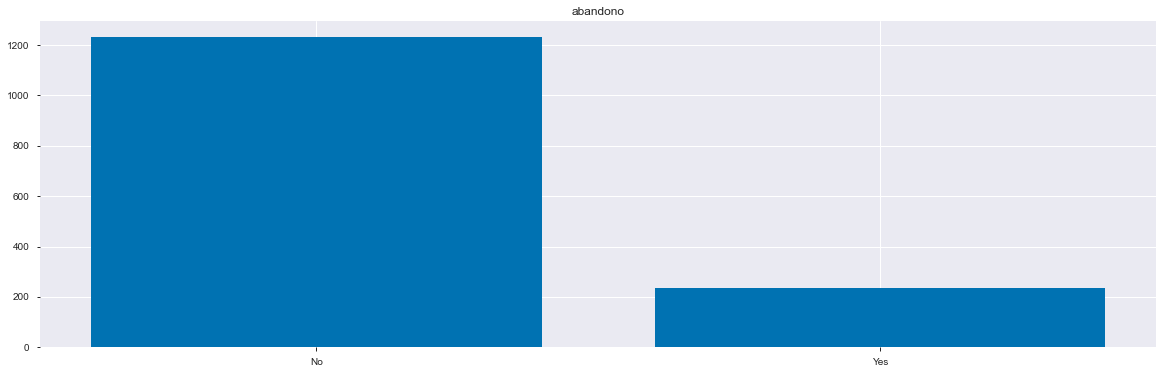

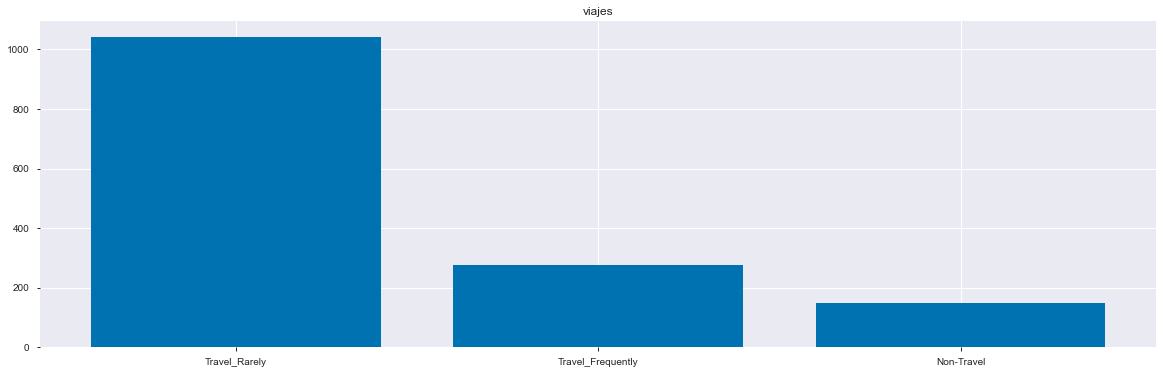

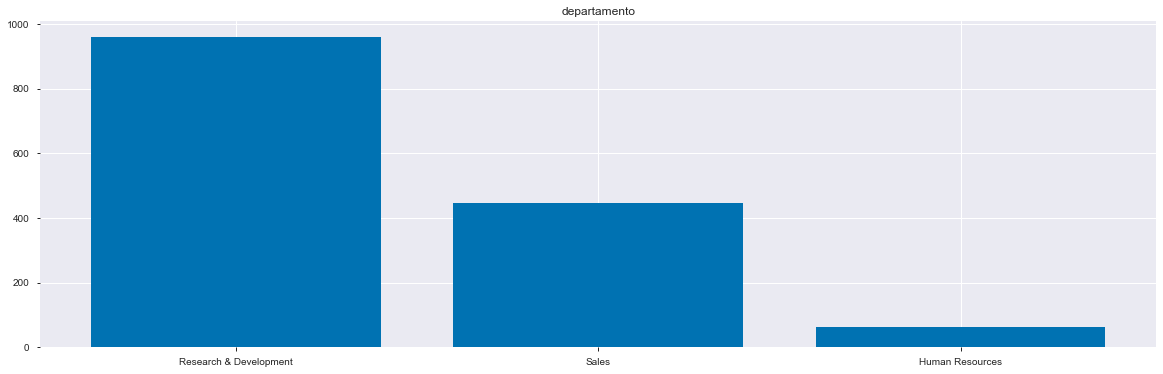

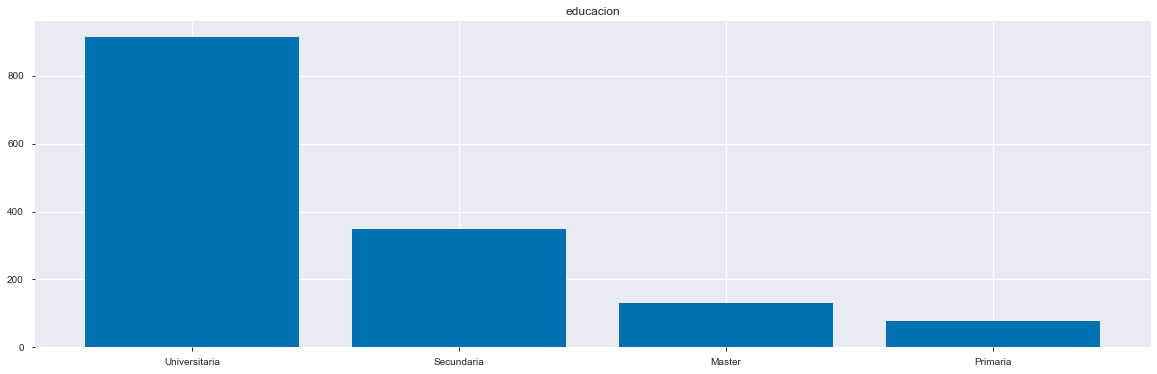

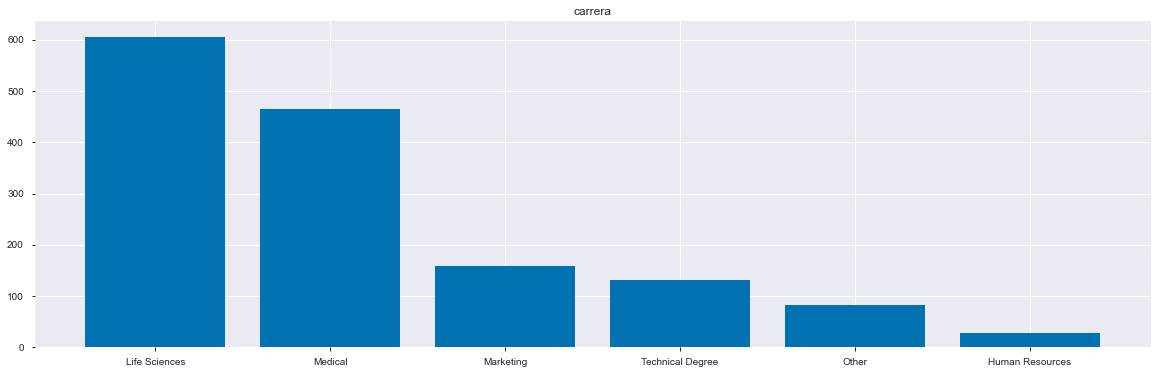

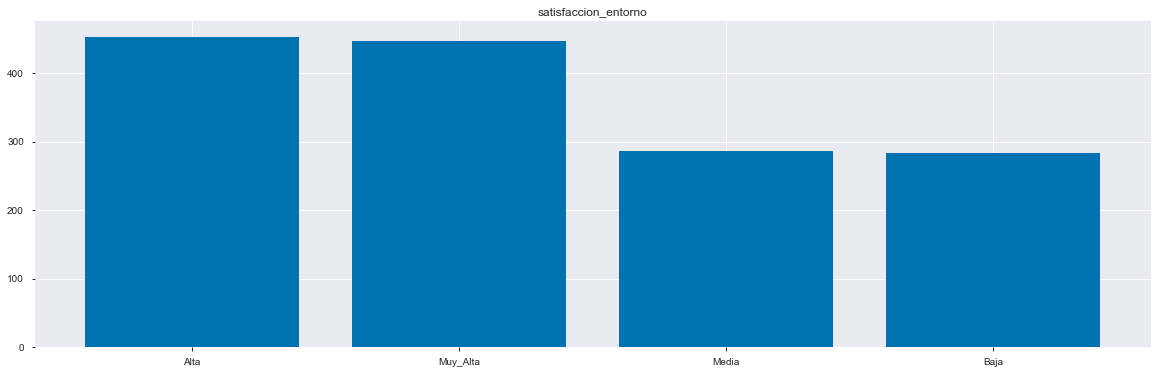

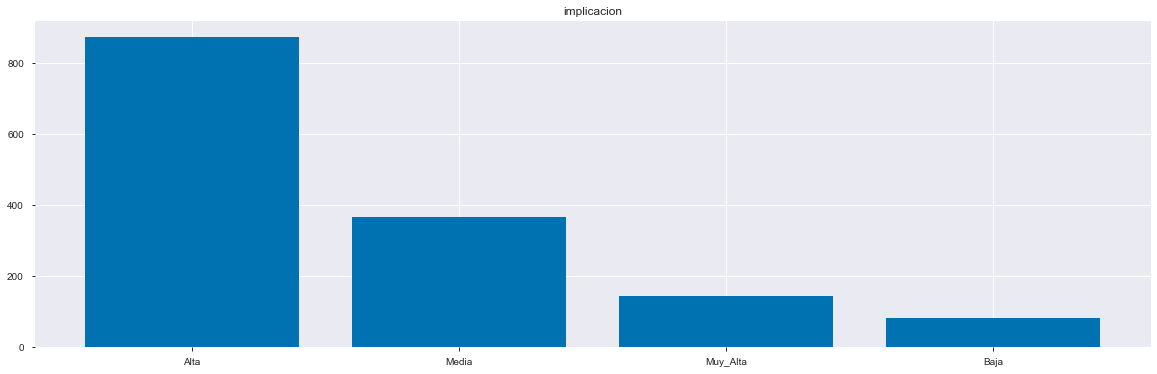

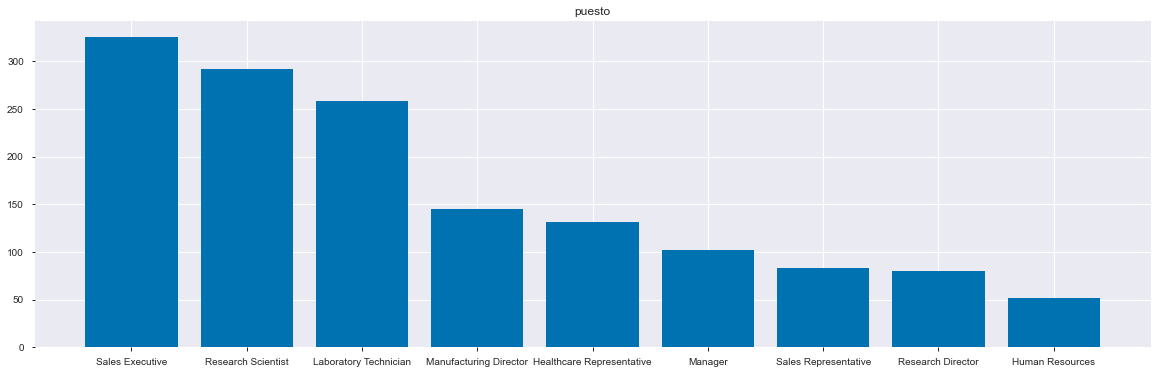

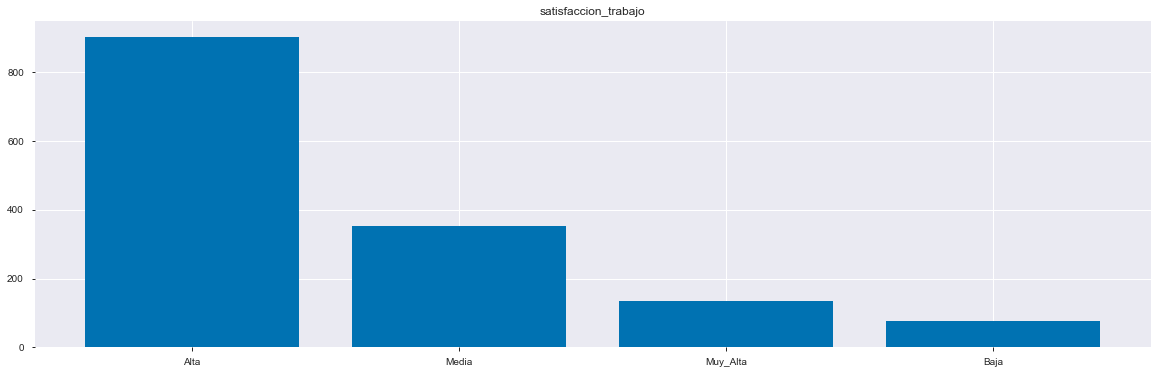

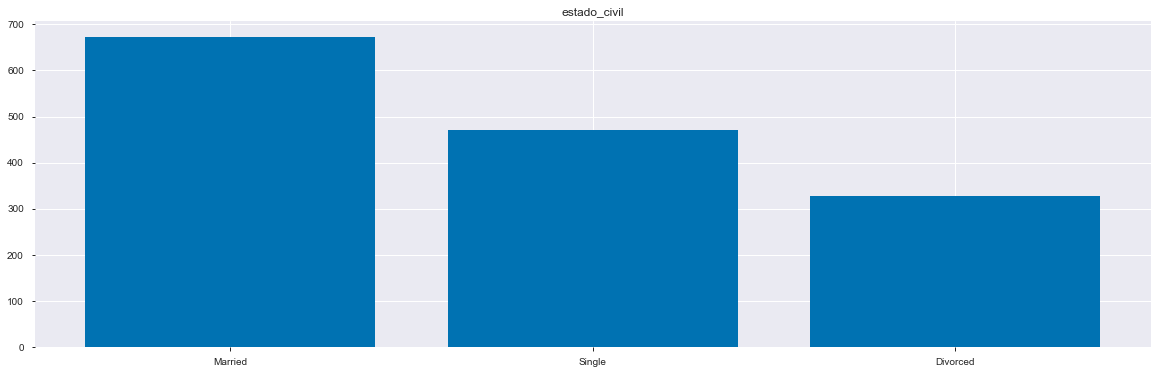

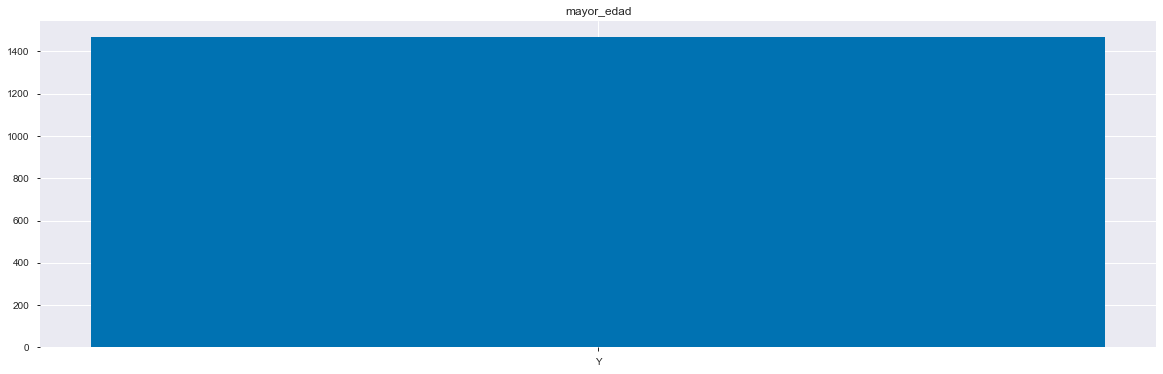

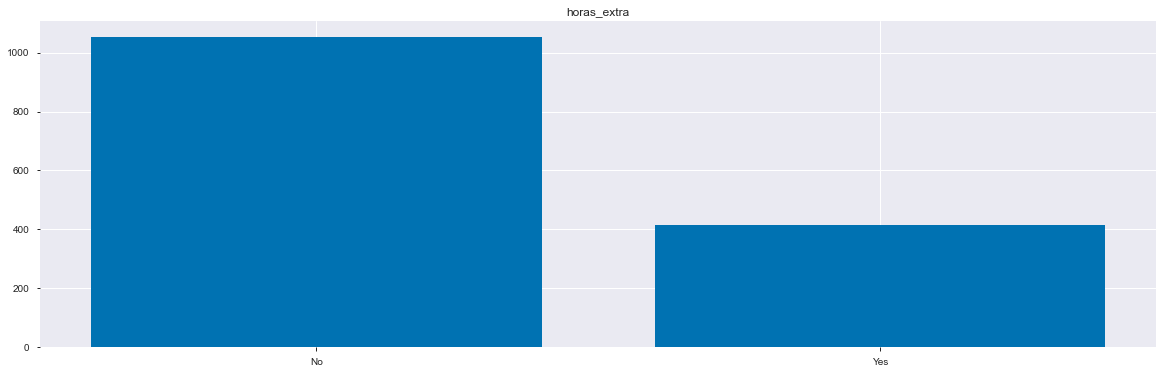

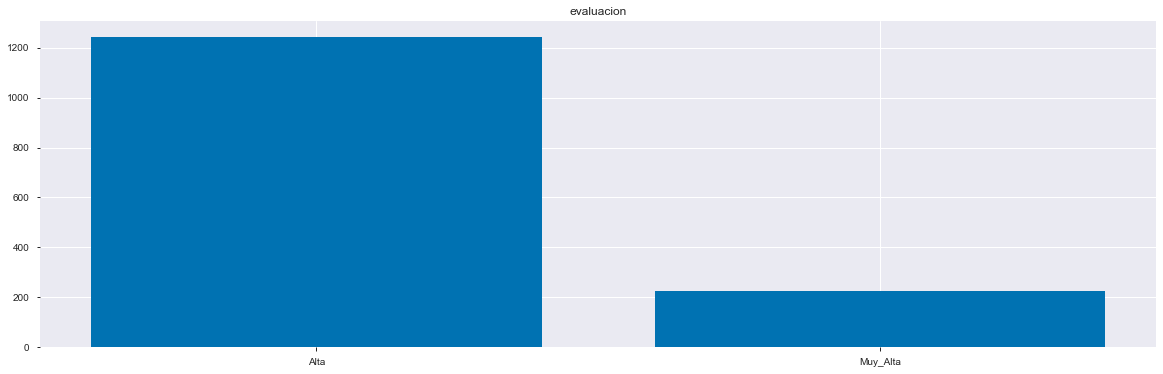

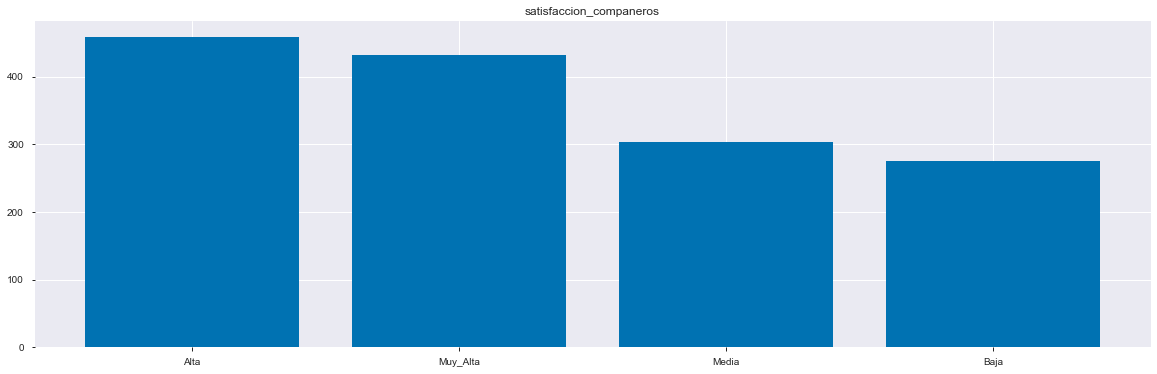

In [28]:
graficos_frecuencia_categoricos(df.select_dtypes('O'))

In [29]:
def graficos_frecuencia_numericos(variables_numericas):
    for variable in variables_numericas:
        plt.figure(figsize=(20,6))
        plt.hist(df[variable],bins=20)
        plt.title(variable)
        plt.show()

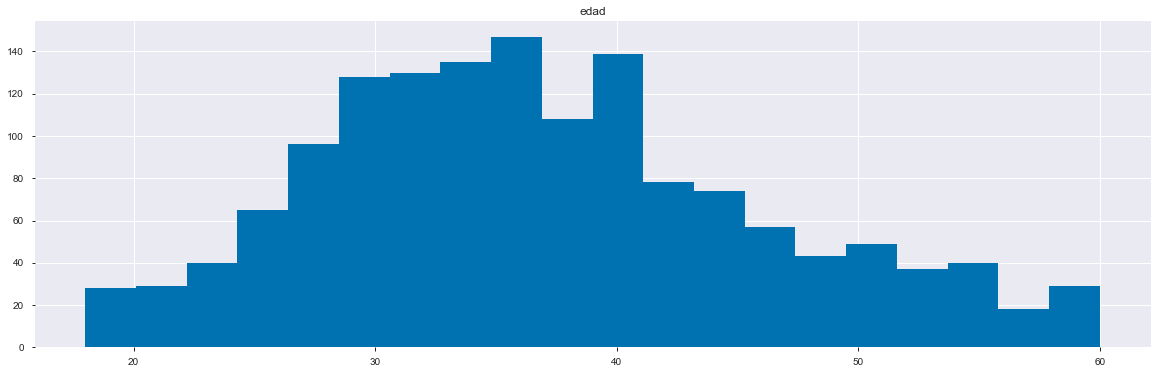

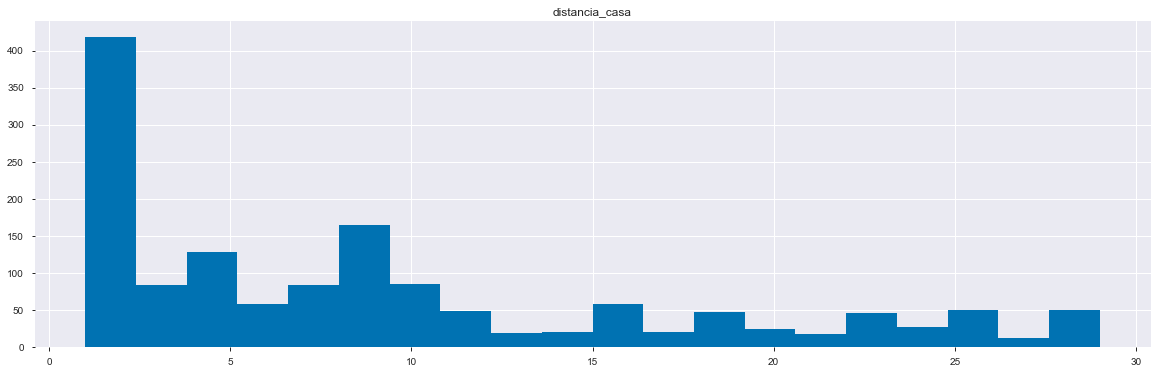

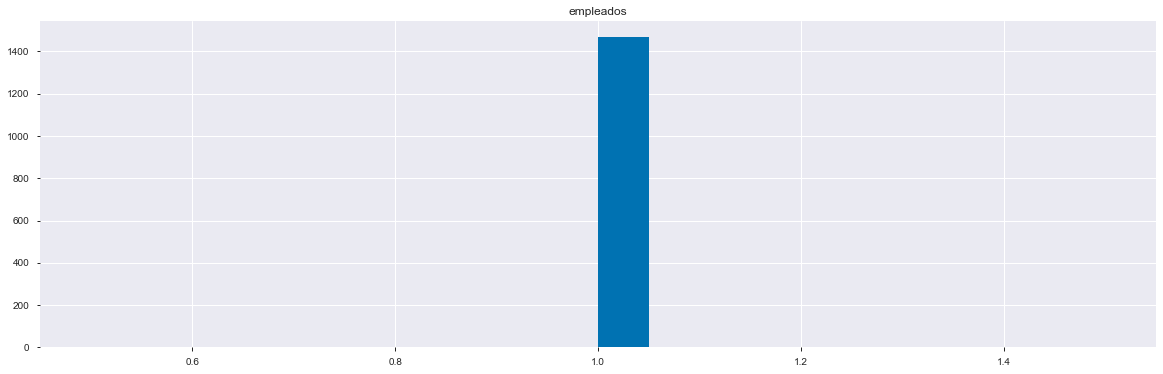

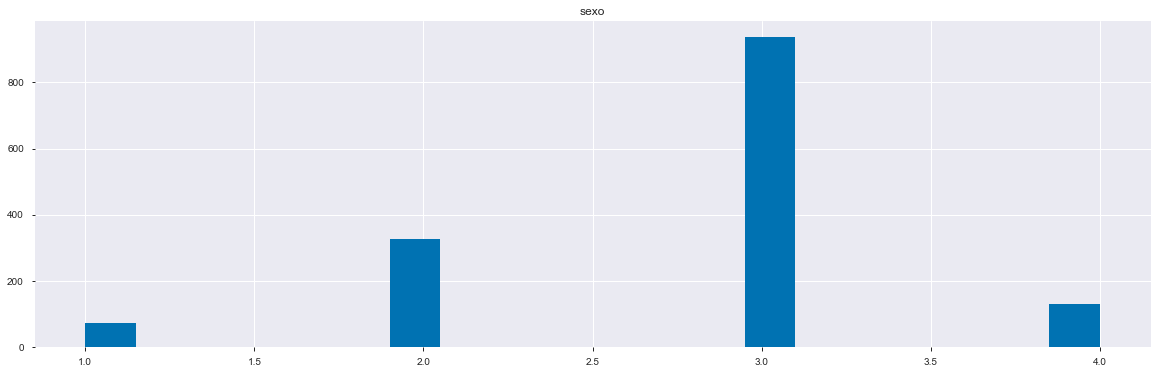

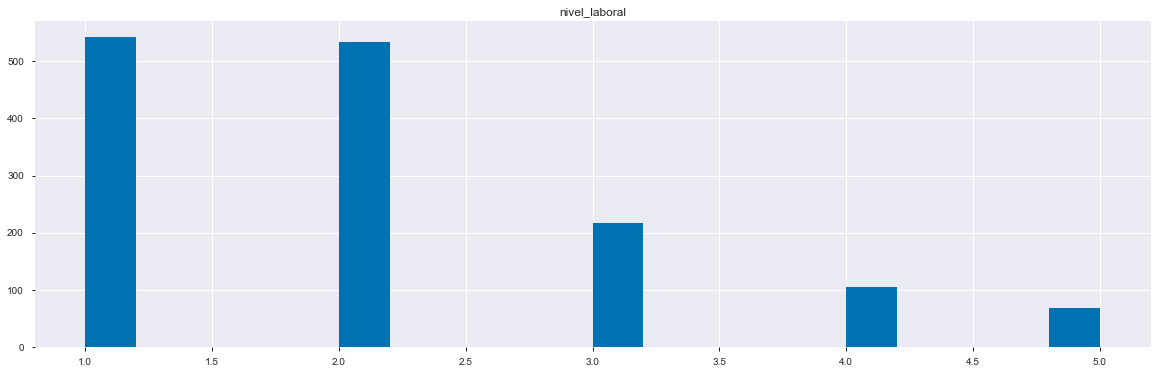

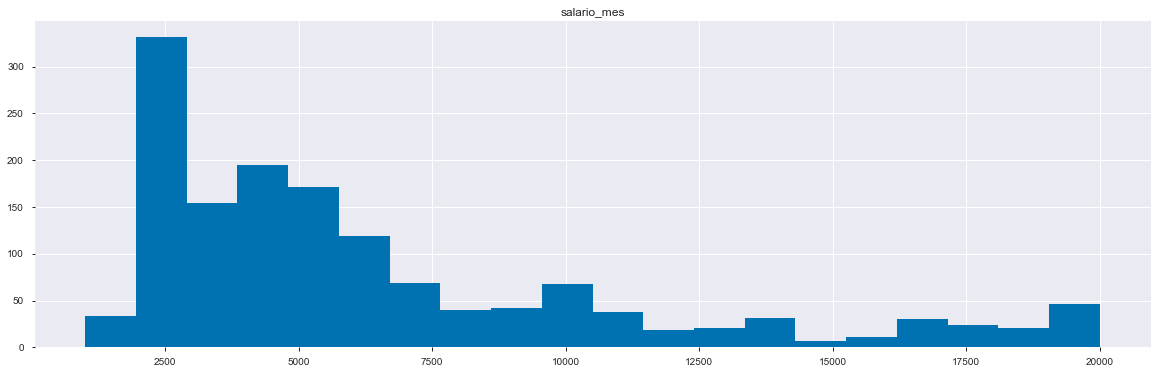

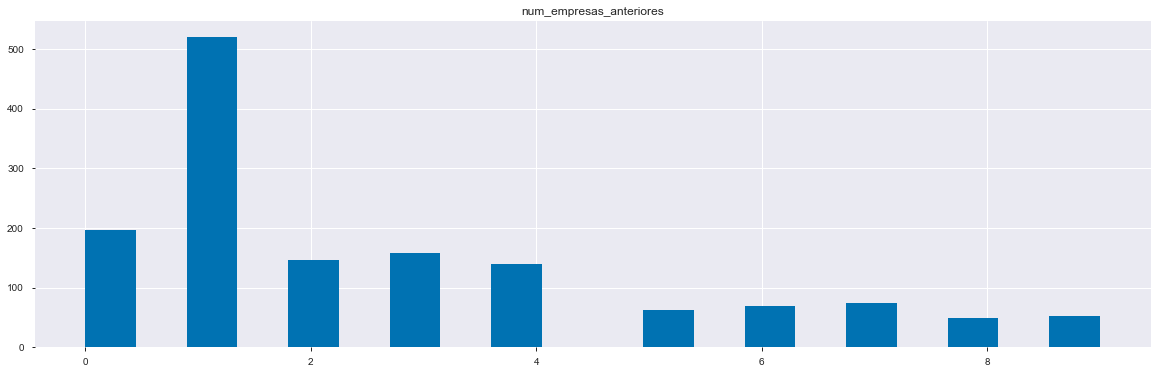

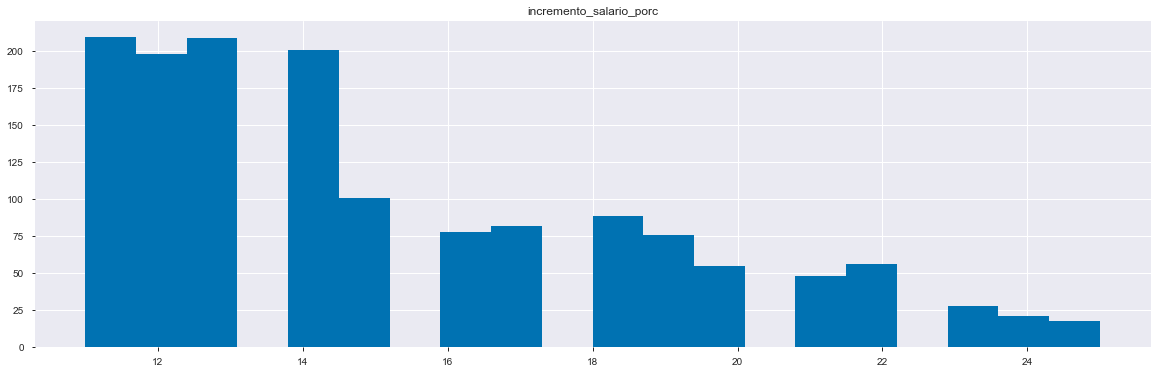

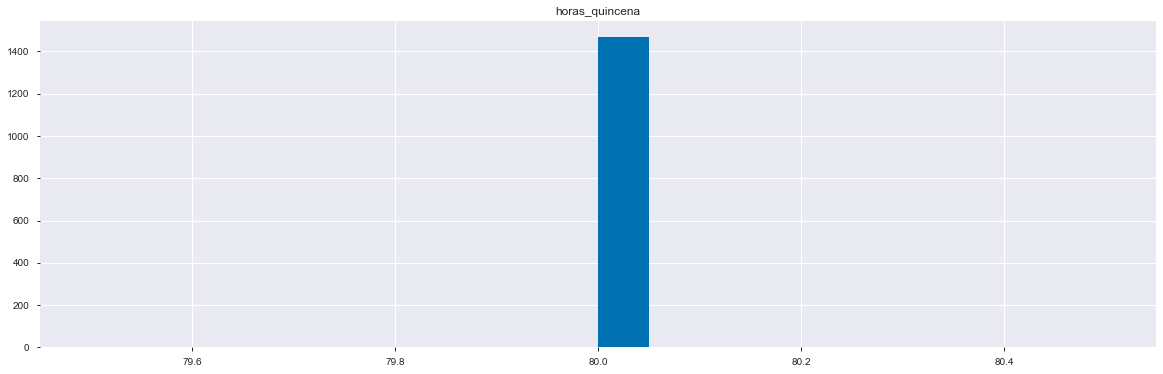

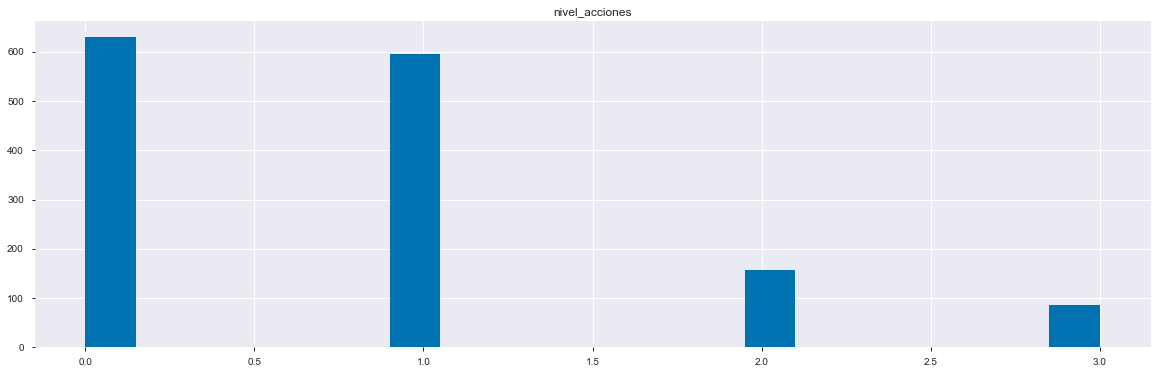

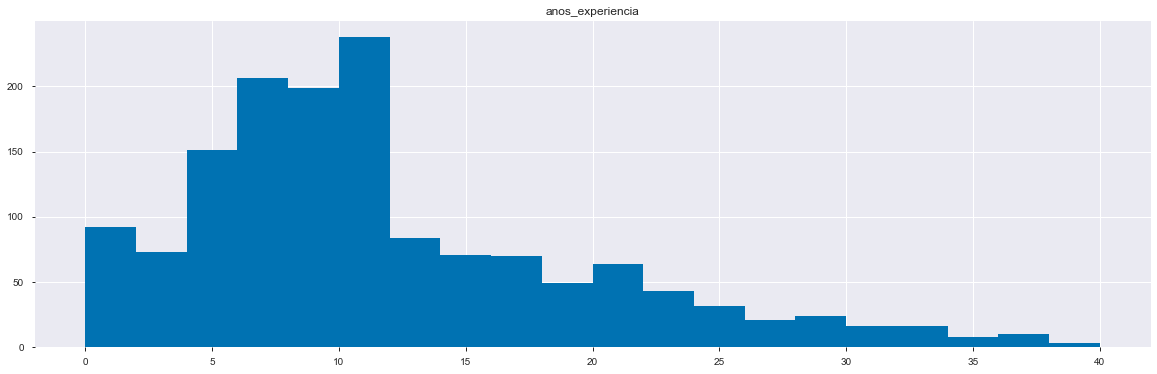

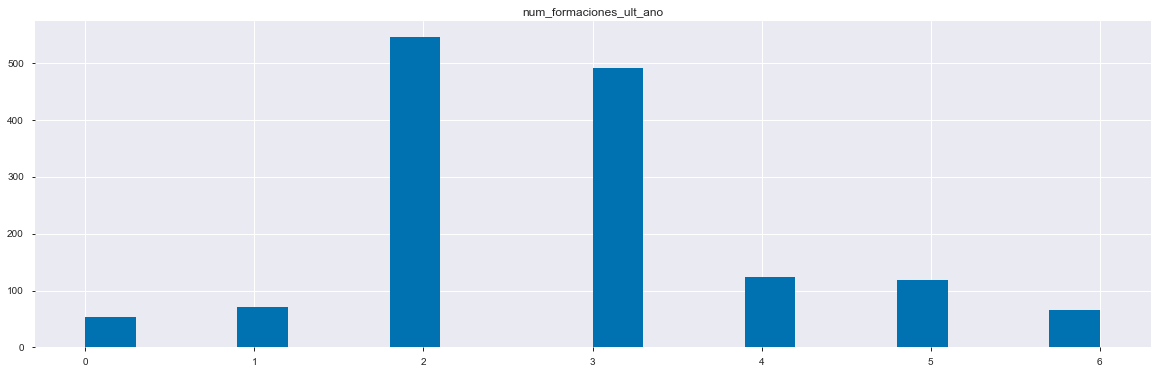

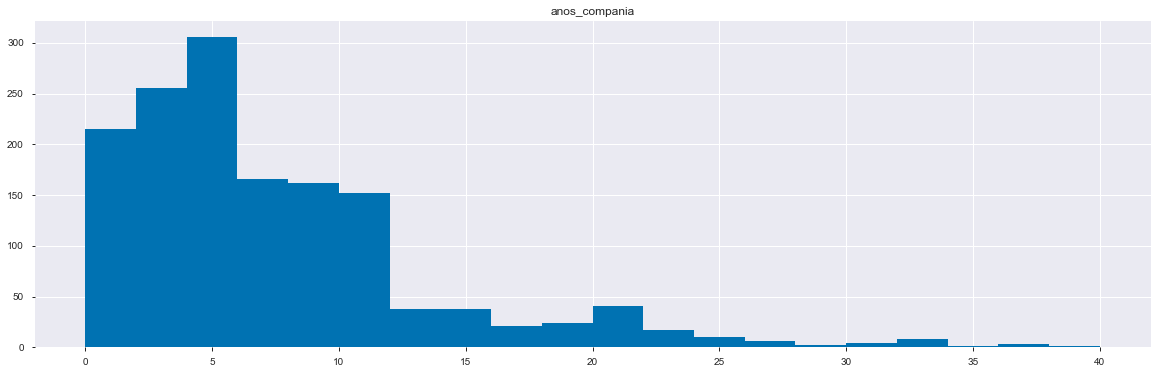

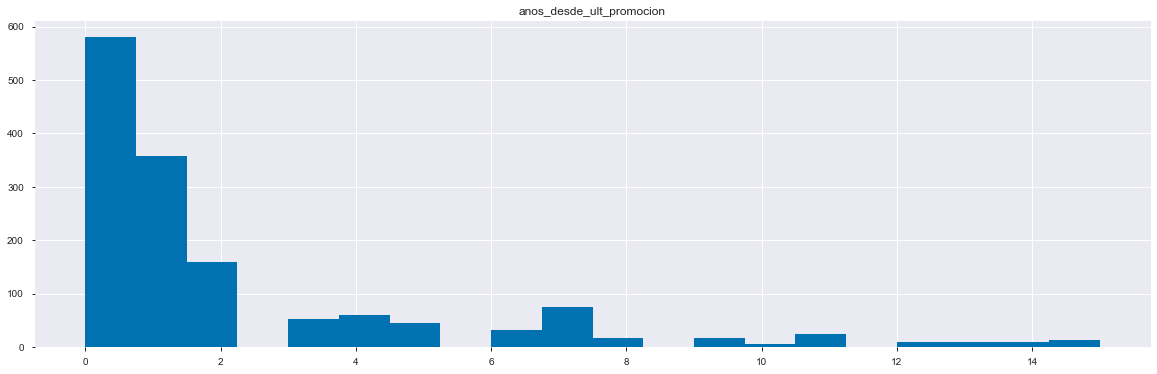

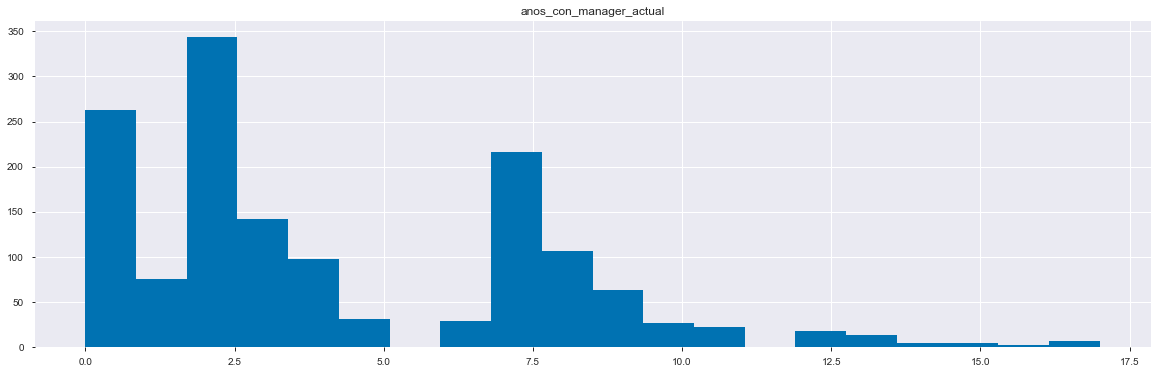

In [30]:
graficos_frecuencia_numericos(df.select_dtypes(exclude='O'))

### Concluciones de los graficos de frecuencia
#### notamos que las dimensiones mayor_edad, horas_quincena y empleados tiene solo un valor, lo que no aporta ningun valor y por lo que podemos eliminarla

In [31]:
df.drop(columns = ['mayor_edad','horas_quincena','empleados'], inplace = True)

### Analisis de Correlacion

#### Otro analisis que nos puede ayudar mucho a entender nuestro problema es la correlacion de las variables con nuestra variable target que en este caso es abandono, lo haremos de forma grafica y de forma numerica

#### Para esto primero debemos convertir la variable target que esta de formato categorico a numerico

In [32]:
 df['abandono'] = df['abandono'].map( {'Yes': 1, 'No': 0} ).astype(int)

In [33]:
def graficos_correlacion(variables,target):
    for variable in variables:
        if(variable!= target):
            grid = sn.FacetGrid(df, col=target, aspect = 2)
            grid.map(plt.hist, variable, bins=20)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


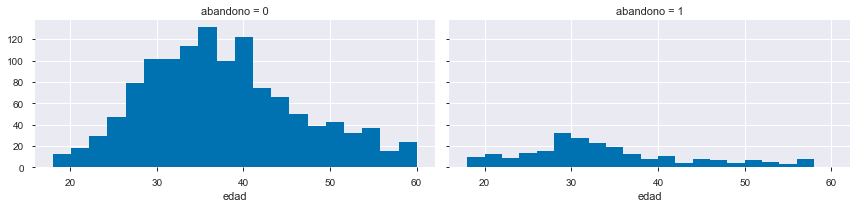

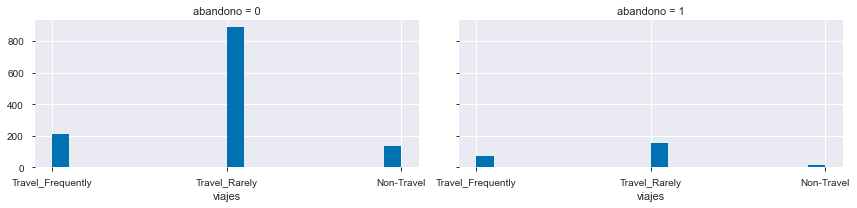

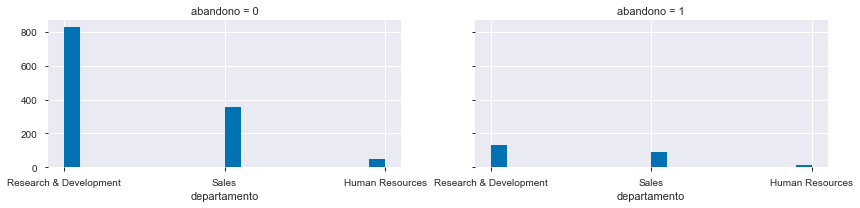

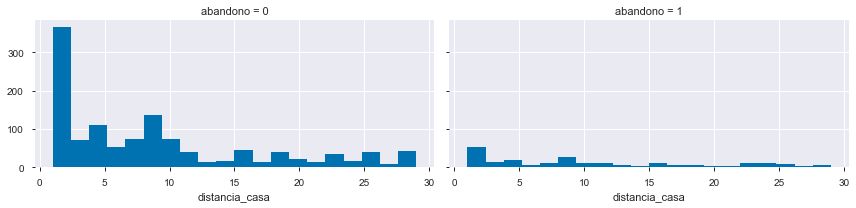

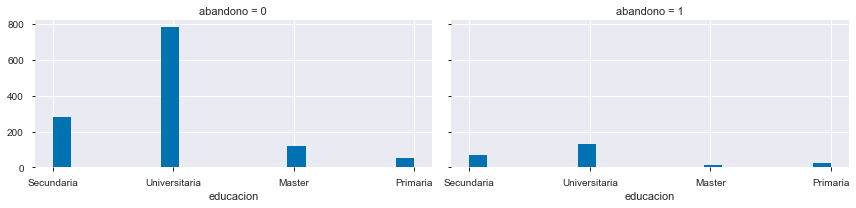

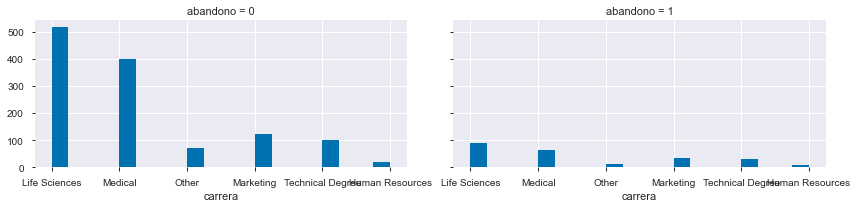

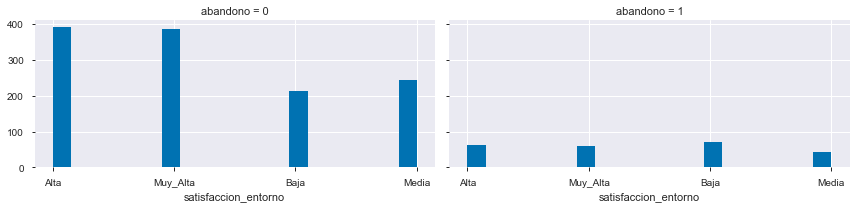

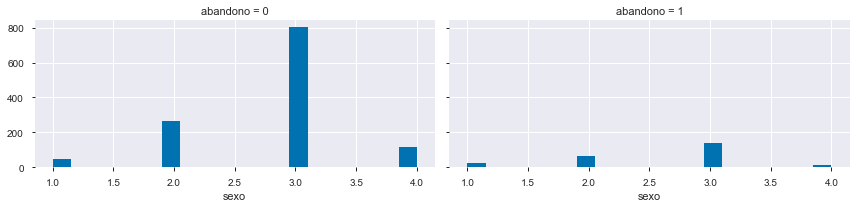

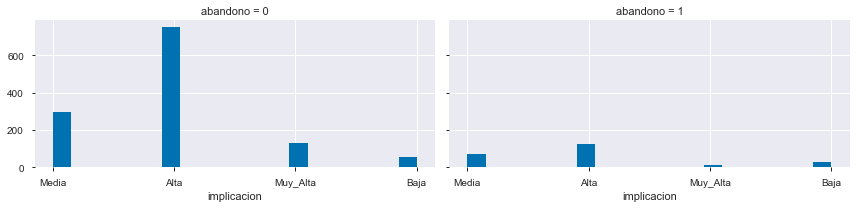

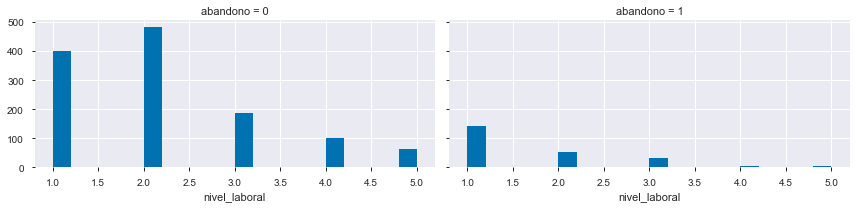

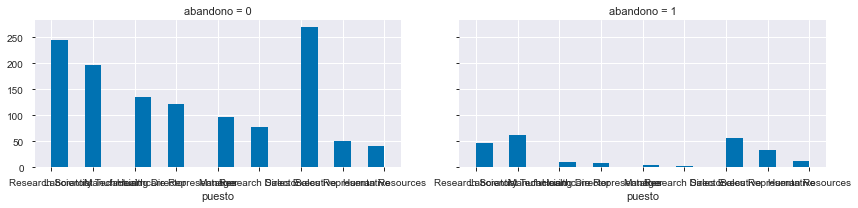

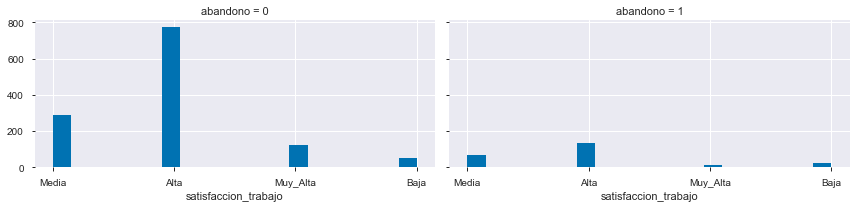

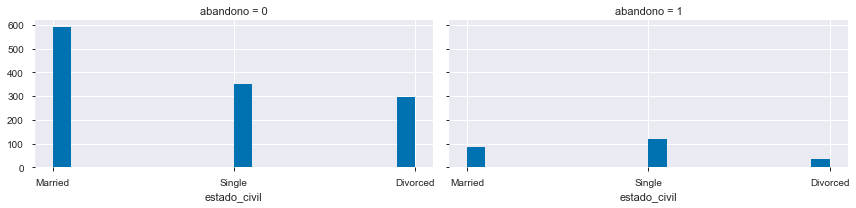

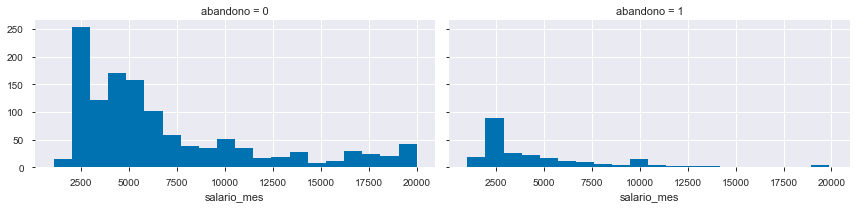

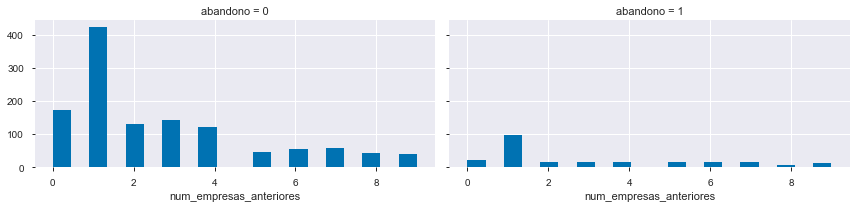

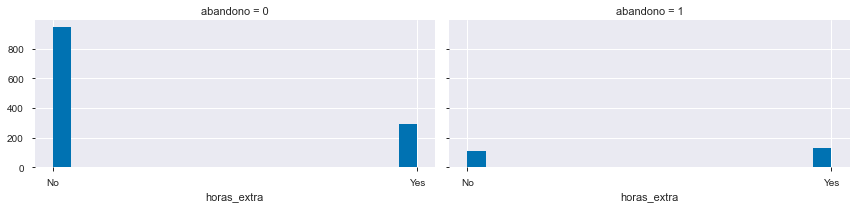

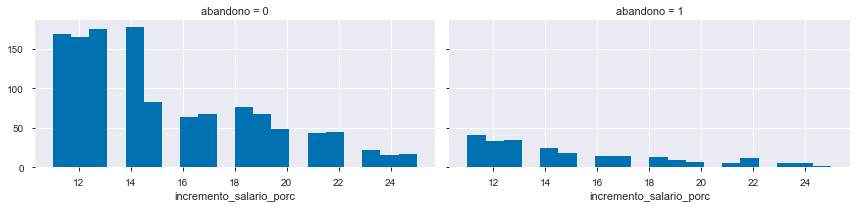

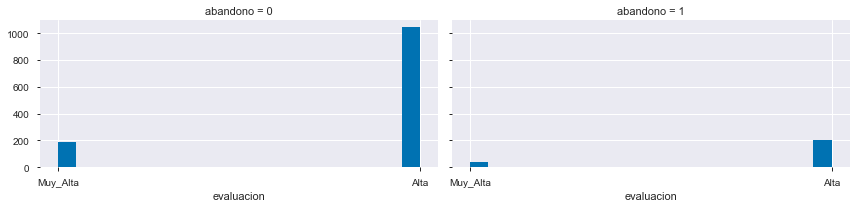

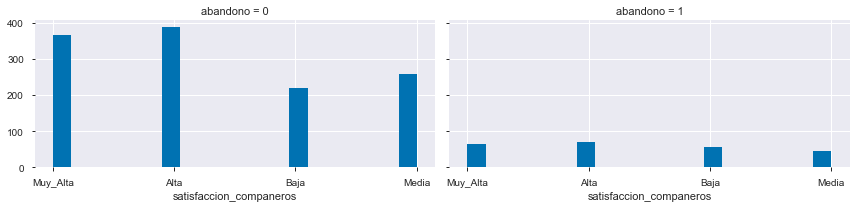

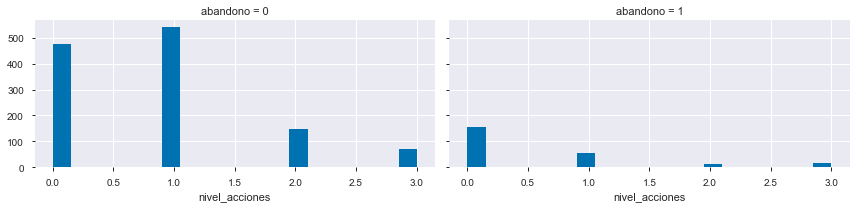

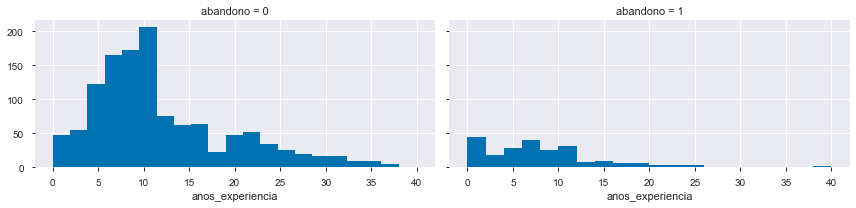

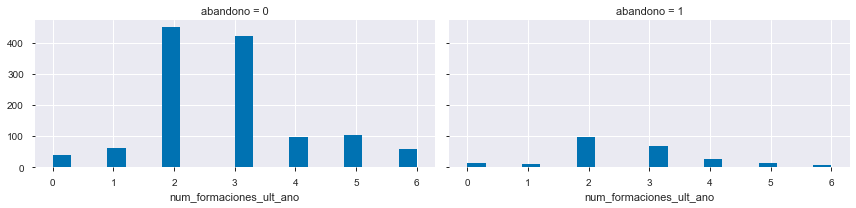

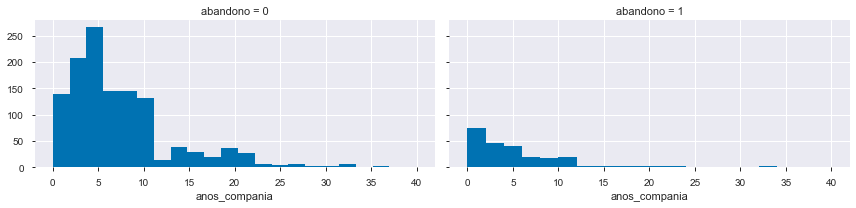

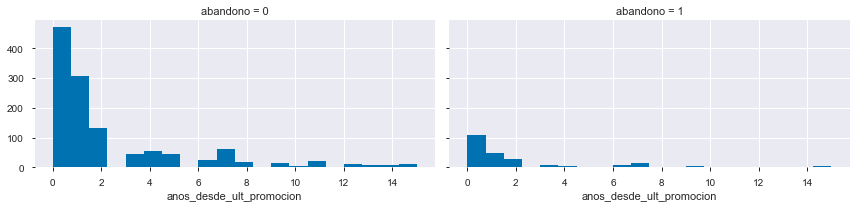

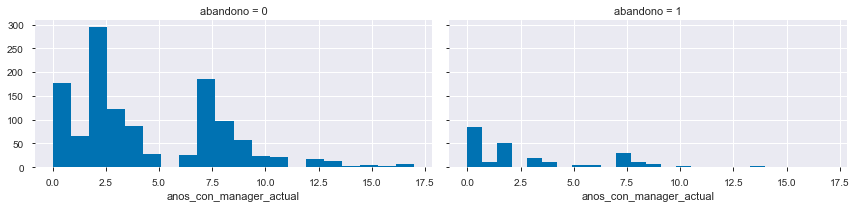

In [34]:
target='abandono'
graficos_correlacion(df,target)

In [35]:
def numeros_correlacion(variables,target):
    for variable in variables:
        if(variable!= target):
            print(df[[variable,target]].groupby(variable, as_index=False).mean().sort_values(by=target, ascending=False).head(5))

In [36]:
target='abandono'
numeros_correlacion(df,target)

    edad  abandono
1     19  0.666667
2     20  0.545455
0     18  0.500000
3     21  0.461538
40    58  0.357143
              viajes  abandono
1  Travel_Frequently  0.249097
2      Travel_Rarely  0.149569
0         Non-Travel  0.080000
             departamento  abandono
2                   Sales  0.206278
0         Human Resources  0.190476
1  Research & Development  0.138398
    distancia_casa  abandono
23              24  0.428571
12              13  0.315789
21              22  0.315789
11              12  0.300000
26              27  0.250000
       educacion  abandono
1       Primaria  0.324675
2     Secundaria  0.195402
3  Universitaria  0.145355
0         Master  0.084615
            carrera  abandono
0   Human Resources  0.259259
5  Technical Degree  0.242424
2         Marketing  0.220126
1     Life Sciences  0.146865
3           Medical  0.135776
  satisfaccion_entorno  abandono
1                 Baja  0.253521
2                Media  0.149826
0                 Alta  0.1368

#### A traves de este analisis ya podemos sacar algunos insight interesantes de nuestro problema como los siguientes:
##### - El departamento que mas abandono tiene es el de ventas
##### - Vemos que las edades jovenes son las que mas abandona, podemos realizar una segmentacion en rango de edades para que quede mas claro
##### - Las personas solteras son las mas propensas a renunciar 
##### - Notamos que la dimencion sueldo la debemos segmentar en rangos para poder entender mejor entendimiento 
##### - Otros factores que influyen en la tasa de abandono son: la distancia al trabajo, el nivel de educacion, la satisfaccion con el trabajo, la implicacion, si realiza horas extras.
##### - Por ultimo vemos que las personas con menos cantidad de años en la empresa son las que no logramos retener

### Transformaremos las variables edades y sueldo para poder entender mejor si influyen en la tasa de abandono y de ser asi cuales son los rangos que mas influyen

#### Para la edad

In [37]:
df.edad.max()

60

In [38]:
df.edad.min()

18

#### generamos 3 rangos que serian joven de 18 a 32, adulto de 33 a 47 y mayor de 48 a 60 

In [39]:
df.loc[(df['edad'] > 18 ) & (df['edad'] <= 32), 'rango_edad'] = 'joven'
df.loc[(df['edad'] > 32 ) & (df['edad'] <= 33), 'rango_edad'] = 'adulto'
df.loc[ df['edad'] > 33, 'rango_edad'] = 'mayor'
df['rango_edad']=df['rango_edad'].astype(str)

#### Para el sueldo

In [40]:
df.salario_mes.max()

19999

In [41]:
df.salario_mes.min()

1009

#### generamos 4 rangos que seran bajo 0 a 4800, medio_bajo de 4801 a 9600, medio_alto de 9601 a 14400 y alto de 14401 a 20000

In [42]:
df.loc[ df['salario_mes'] <= 4800, 'rango_salario'] = 'bajo'
df.loc[(df['salario_mes'] > 4800 ) & (df['salario_mes'] <= 9600), 'rango_salario'] = 'medio_bajo'
df.loc[(df['salario_mes'] > 9600 ) & (df['salario_mes'] <= 14400), 'rango_salario'] = 'medio_alto'
df.loc[ df['salario_mes'] > 14400, 'rango_salario'] = 'alto'
df['rango_salario']=df['rango_salario'].astype(str)

### Volvemos a realizar los graficos de correlacion de estas dos dimenciones nuevas para ver que sucede

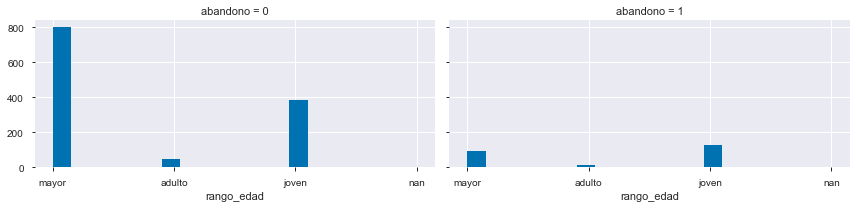

In [43]:
grid = sn.FacetGrid(df, col='abandono', aspect = 2)
grid.map(plt.hist, 'rango_edad', bins=20)

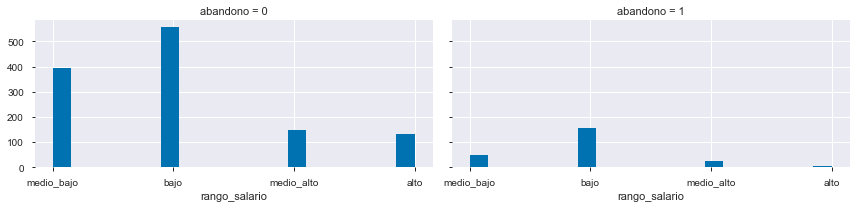

In [44]:
grid = sn.FacetGrid(df, col='abandono', aspect = 2)
grid.map(plt.hist, 'rango_salario', bins=20)

#### como podemos ver nos resulta mas facil identificar que las personas que mas dejan la empresa segun su edad son los jovenes y segun el salario son los aquellos que lo tienen mas bajo, esto puede parecer muy obvio pero siempre hay que verificar que lo que los datos nos reflejan y no lo que parece muy obvio para nosotros

#### una vez finalizado el analisis exploratorio volvemos a hacer el reporte de profilereport para ver como ha quedado nuestro dataframe

In [45]:
#prof = ProfileReport(df) 
#prof.to_file('dataset_final.html')

### Caso de estudio

#### Trataremos de  bajar este caso de la teoria a los numeros cuantificando el problema que nos genera el abandono del personal en numeros reales

#### Calculamos la tasa de abandono de esta empresa

In [46]:
df.abandono.value_counts(normalize = True) * 100

0    83.877551
1    16.122449
Name: abandono, dtype: float64

#### Tomando el estudio de "Cost of Turnover" del Center for American Progress y la tasa de abandono de nuestra empresa podemos calcular facilmente cual fue la perdida que tuvimos en el abandono de los empleados

* El coste de la fuga de los empleados que ganan menos de 30000 es del 16,1% de su salario
* El coste de la fuga de los empleados que ganan entre 30000-50000 es del 19,7% de su salario
* El coste de la fuga de los empleados que ganan entre 50000-75000 es del 20,4% de su salario
* El coste de la fuga de los empleados que ganan más de 75000 es del 21% de su salario

#### Primero calculamos el sueldo anual de los empleados

In [47]:
df['salario_ano'] = df.salario_mes.transform(lambda x: x*12)
df[['salario_mes','salario_ano']]

,salario_mes,salario_ano
id,,
1,5993,71916
2,5130,61560
4,2090,25080
5,2909,34908
7,3468,41616
...,...,...
2061,2571,30852
2062,9991,119892
2064,6142,73704


#### calculamos segun los porcentajes del informe el impacto que tendria cada empleado si renunciara

In [48]:
condiciones = [(df['salario_ano'] <= 30000),
               (df['salario_ano'] > 30000) & (df['salario_ano'] <= 50000),
               (df['salario_ano'] > 50000) & (df['salario_ano'] <= 75000),
               (df['salario_ano'] > 75000)]
resultados = [df.salario_ano * 0.161, df.salario_ano * 0.197, df.salario_ano * 0.204, df.salario_ano * 0.21]
df['impacto_abandono'] = np.select(condiciones,resultados, default = -999)
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,sexo,implicacion,...,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,rango_edad,rango_salario,salario_ano,impacto_abandono
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,3,Alta,...,0,8,0,6,0,5,mayor,medio_bajo,71916,14670.864
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,2,Media,...,1,10,3,10,1,7,mayor,medio_bajo,61560,12558.240
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,2,Media,...,0,7,3,0,0,0,mayor,bajo,25080,4037.880
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,3,Alta,...,0,8,3,8,3,0,adulto,bajo,34908,6876.876
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,3,Alta,...,1,6,3,2,2,2,joven,bajo,41616,8198.352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,Travel_Frequently,Research & Development,23,Master,Medical,Alta,4,Muy_Alta,...,1,17,3,5,0,3,mayor,bajo,30852,6077.844
2062,39,0,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,2,Media,...,1,9,5,7,1,7,mayor,medio_alto,119892,25177.320
2064,27,0,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,4,Muy_Alta,...,1,6,0,6,0,3,joven,medio_bajo,73704,15035.616


#### Hecho hecho podemos realizar muchas preguntas, como por ejemplo:
#### ¿Cúanto nos ha costado este problema en el último año?

In [49]:
coste_total =  df.loc[df.abandono == 1].impacto_abandono.sum()
coste_total

2719005.912

#### ¿Cuanto nos cuesta que los empleados no estén motivados? (pérdidas en implicación == Baja)

In [50]:
df.loc[(df.abandono == 1) & (df.implicacion == 'Baja')].impacto_abandono.sum()

368672.688

#### ¿Cuanto dinero podríamos ahorrar fidelizando mejor a nuestros empleados?

In [51]:
print(f"Reducir un 10% la fuga de empleados nos ahorraría {int(coste_total * 0.1)}$ cada año.")

print(f"Reducir un 20% la fuga de empleados nos ahorraría {int(coste_total * 0.2)}$ cada año.")

print(f"Reducir un 30% la fuga de empleados nos ahorraría {int(coste_total * 0.3)}$ cada año.")

Reducir un 10% la fuga de empleados nos ahorraría 271900$ cada año.
Reducir un 20% la fuga de empleados nos ahorraría 543801$ cada año.
Reducir un 30% la fuga de empleados nos ahorraría 815701$ cada año.


#### Habíamos visto que los representantes de ventas son el puesto que más se van. ¿Tendría sentido hacer un plan específico para ellos? ¿Cual sería el coste ahorrado si disminuimos la fuga un 30%?
#### Primero vamos a calcular el % de representantes de ventas que se han ido el año pasado

In [52]:
total_repre_pasado = len(df.loc[df.puesto == 'Sales Representative'])
abandonos_repre_pasado = len(df.loc[(df.puesto == 'Sales Representative') & (df.abandono == 1)])
porc_pasado = abandonos_repre_pasado / total_repre_pasado

porc_pasado

0.39759036144578314

#### Ahora vamos a estimar cuántos se nos irán este año

In [53]:
total_repre_actual = len(df.loc[(df.puesto == 'Sales Representative') & (df.abandono == 0)])
se_iran = int(total_repre_actual * porc_pasado)

se_iran

19

#### Sobre ellos cuantos podemos retener (hipótesis 30%) y cuanto dinero puede suponer

In [54]:
retenemos = int(se_iran * 0.3)

ahorramos = df.loc[(df.puesto == 'Sales Representative') & (df.abandono == 0),'impacto_abandono'].sum() * porc_pasado * 0.3

print(f'Podemos retener {retenemos} representantes de ventas y ello supondría ahorrar {ahorramos}$.')

Podemos retener 5 representantes de ventas y ello supondría ahorrar 37447.22424578312$.


####  Ahora sabemos que podemos gastarnos hasta 37.000 sólo en acciones específicas para retener a representantes de ventas y se estarían pagando sólas con la pérdida evitada

### Preparar dataset para el modelado

#### Para este paso primero hacemos una copia del dataframe original y lo limpiamos de aquellas dimenciones calculadas por nosotros

In [55]:
df_ml = df.copy()

In [56]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   int32  
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1470 non-null   object 
 6   carrera                   1470 non-null   object 
 7   satisfaccion_entorno      1470 non-null   object 
 8   sexo                      1470 non-null   int32  
 9   implicacion               1470 non-null   object 
 10  nivel_laboral             1470 non-null   int64  
 11  puesto                    1470 non-null   object 
 12  satisfaccion_trabajo      1470 non-null   object 
 13  estado_civil              1470 non-null   object 
 14  salario_

In [57]:
df_ml.drop(columns = ['salario_ano','impacto_abandono'], inplace = True)

In [58]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   edad                      1470 non-null   int64 
 1   abandono                  1470 non-null   int32 
 2   viajes                    1470 non-null   object
 3   departamento              1470 non-null   object
 4   distancia_casa            1470 non-null   int64 
 5   educacion                 1470 non-null   object
 6   carrera                   1470 non-null   object
 7   satisfaccion_entorno      1470 non-null   object
 8   sexo                      1470 non-null   int32 
 9   implicacion               1470 non-null   object
 10  nivel_laboral             1470 non-null   int64 
 11  puesto                    1470 non-null   object
 12  satisfaccion_trabajo      1470 non-null   object
 13  estado_civil              1470 non-null   object
 14  salario_mes             

#### Pasamos todas las variables categoricas a numericas

In [59]:
categoricas = df_ml.select_dtypes('O')
ohe = OneHotEncoder(sparse = False)
ohe.fit(categoricas)
cat_num = ohe.transform(categoricas)
cat_num = pd.DataFrame(cat_num, columns = ohe.get_feature_names_out(input_features = categoricas.columns)).reset_index(drop = True)

In [60]:
cat_num

,viajes_Non-Travel,viajes_Travel_Frequently,viajes_Travel_Rarely,departamento_Human Resources,departamento_Research & Development,departamento_Sales,educacion_Master,educacion_Primaria,educacion_Secundaria,educacion_Universitaria,...,satisfaccion_companeros_Media,satisfaccion_companeros_Muy_Alta,rango_edad_adulto,rango_edad_joven,rango_edad_mayor,rango_edad_nan,rango_salario_alto,rango_salario_bajo,rango_salario_medio_alto,rango_salario_medio_bajo
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


#### las unimos con las variables numericas

In [61]:
num = df.select_dtypes('number').reset_index(drop = True)
df_ml = pd.concat([cat_num,num], axis = 1)

In [62]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 72 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   viajes_Non-Travel                    1470 non-null   float64
 1   viajes_Travel_Frequently             1470 non-null   float64
 2   viajes_Travel_Rarely                 1470 non-null   float64
 3   departamento_Human Resources         1470 non-null   float64
 4   departamento_Research & Development  1470 non-null   float64
 5   departamento_Sales                   1470 non-null   float64
 6   educacion_Master                     1470 non-null   float64
 7   educacion_Primaria                   1470 non-null   float64
 8   educacion_Secundaria                 1470 non-null   float64
 9   educacion_Universitaria              1470 non-null   float64
 10  carrera_Human Resources              1470 non-null   float64
 11  carrera_Life Sciences         

#### para finalizar realizamos el escalado de los datos para que no tengamos datos muy diferente, esto realizara el calculo para dejar todos los valores estre 0 y 1 

In [71]:
for variable in df_ml:
    df_ml[variable] = MinMaxScaler().fit_transform(np.array(df_ml[variable]).reshape(-1,1)) 

In [72]:
df_ml

,viajes_Non-Travel,viajes_Travel_Frequently,viajes_Travel_Rarely,departamento_Human Resources,departamento_Research & Development,departamento_Sales,educacion_Master,educacion_Primaria,educacion_Secundaria,educacion_Universitaria,...,num_empresas_anteriores,incremento_salario_porc,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.888889,0.000000,0.000000,0.200,0.000000,0.150,0.000000,0.294118,0.262454,0.262580
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.111111,0.857143,0.333333,0.250,0.500000,0.250,0.066667,0.411765,0.217009,0.218974
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.666667,0.285714,0.000000,0.175,0.500000,0.000,0.000000,0.000000,0.056925,0.043108
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.111111,0.000000,0.000000,0.200,0.500000,0.200,0.200000,0.000000,0.100053,0.101707
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.000000,0.071429,0.333333,0.150,0.500000,0.050,0.133333,0.117647,0.129489,0.128983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.444444,0.428571,0.333333,0.425,0.500000,0.125,0.000000,0.176471,0.082254,0.085214
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.444444,0.285714,0.333333,0.225,0.833333,0.175,0.066667,0.411765,0.472986,0.479440
1467,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.111111,0.642857,0.333333,0.150,0.000000,0.150,0.000000,0.176471,0.270300,0.270108
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.222222,0.214286,0.000000,0.425,0.500000,0.225,0.000000,0.470588,0.230700,0.232111


### Ya tenemos el dataframe listo para Modelar

### Para modelar primero importamos las librerias necesarias

In [96]:
from matplotlib import pyplot
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score 
from sklearn.metrics import classification_report
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import roc_auc_score,roc_curve, auc, plot_roc_curve, classification_report

### Definimos la funcion con la que evaluaremos los modelos

In [74]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    y_prob_train = model.predict_proba(X_train)[:, 1]
    y_prob_test = model.predict_proba(X_test)[:, 1]

    metrics = {
        'Precision': [
            precision_score(y_train, y_pred_train, pos_label=1),
            precision_score(y_test, y_pred_test, pos_label=1)
        ],
        'Recall': [
            recall_score(y_train, y_pred_train, pos_label=1),
            recall_score(y_test, y_pred_test, pos_label=1)
        ],
        'F1': [
            f1_score(y_train, y_pred_train, pos_label=1),
            f1_score(y_test, y_pred_test, pos_label=1)
        ],
        'Accuracy': [
            accuracy_score(y_train, y_pred_train),
            accuracy_score(y_test, y_pred_test)
        ],
        'MCC': [
            matthews_corrcoef(y_train, y_pred_train),
            matthews_corrcoef(y_test, y_pred_test)
        ],
        'Roc-Auc': [
            roc_auc_score(y_train, y_prob_train),
            roc_auc_score(y_test, y_prob_test)
        ]
    }

    display(pd.DataFrame(metrics, index=['Train set', 'Test set']))

    cf_matrix = confusion_matrix(y_test, y_pred_test)

    categories = ['Negative', 'Positive']
    group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    group_percentages = [
        '{0:.2%}'.format(value)
        for value in cf_matrix.flatten() / np.sum(cf_matrix)
    ]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)

    fpr_train, tpr_train, _ = roc_curve(y_train, y_prob_train, pos_label=1)
    roc_auc_train = auc(fpr_train, tpr_train)

    fpr_val, tpr_val, _ = roc_curve(y_test, y_prob_test, pos_label=1)
    roc_auc_val = auc(fpr_val, tpr_val)

    fig, ax = plt.subplots(1, 2, figsize=(20, 5))
    
   
    sn.heatmap(cf_matrix,
                annot=labels,
                cmap='Reds',
                fmt='',
                xticklabels=categories,
                yticklabels=categories,
                ax=ax[0])

    ax[0].set_xlabel("Predicted values", fontdict={'size': 12}, labelpad=10)
    ax[0].set_ylabel("Actual values", fontdict={'size': 12}, labelpad=10)
    ax[0].set_title("Confusion Matrix", fontdict={'size': 16}, pad=20)

    ax[1].plot(fpr_train,
               tpr_train,
               color='red',
               label='ROC curve Train (area = %0.3f)' % roc_auc_train)
    ax[1].plot(fpr_val,
               tpr_val,
               color='blue',
               label='ROC curve Test (area = %0.3f)' % roc_auc_val)
    ax[1].plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
    ax[1].set_xlabel('False Positive Rate', fontdict={'size': 12}, labelpad=10)
    ax[1].set_ylabel('True Positive Rate', fontdict={'size': 12}, labelpad=10)
    ax[1].set_xlim([0, 1])
    ax[1].set_ylim([0, 1])
    ax[1].set_title('ROC Curve', fontdict={'size': 16}, pad=20)
    ax[1].legend(loc="lower right")
    ax[1].grid()

    plt.show()
    return cf_matrix

#### Definimos las variables Target y cuales las predictoras

In [75]:
x = df_ml.drop(columns='abandono')
y = df_ml['abandono']

#### Dividimos el train y el test

In [76]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3) 

### Empezamos a evaluar los distintos modelos

#### Regresion logistica

,Precision,Recall,F1,Accuracy,MCC,Roc-Auc
Train set,0.831579,0.490683,0.617188,0.904762,0.592665,0.879533
Test set,0.709677,0.289474,0.411215,0.857143,0.391223,0.790195


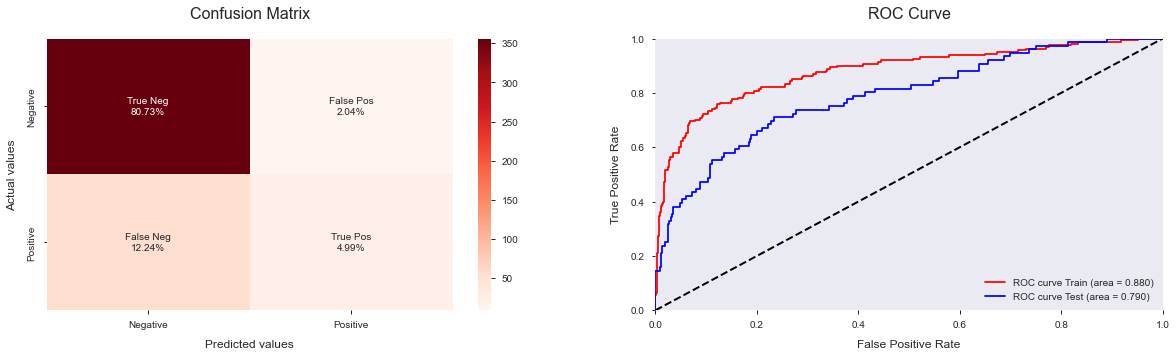

In [90]:
LR = LogisticRegression()
LR.fit(train_x,train_y)
matrixLR=evaluate_model(LR, train_x, train_y, test_x, test_y)

#### Random Forest

,Precision,Recall,F1,Accuracy,MCC,Roc-Auc
Train set,1.000000,1.000000,1.00,1.000000,1.000000,1.000000
Test set,0.666667,0.210526,0.32,0.845805,0.314008,0.768133


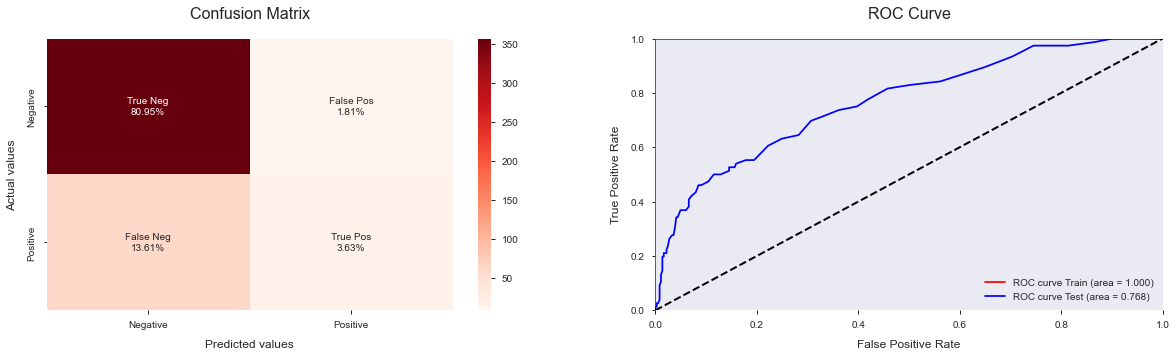

In [86]:
RFC = RandomForestClassifier(random_state=0)
RFC.fit(train_x,train_y)
matrixRF=evaluate_model(RFC, train_x, train_y, test_x, test_y)

#### Bayes ingenuo

,Precision,Recall,F1,Accuracy,MCC,Roc-Auc
Train set,0.554795,0.503106,0.527687,0.859086,0.445845,0.819396
Test set,0.600000,0.434211,0.503817,0.852608,0.427441,0.760959


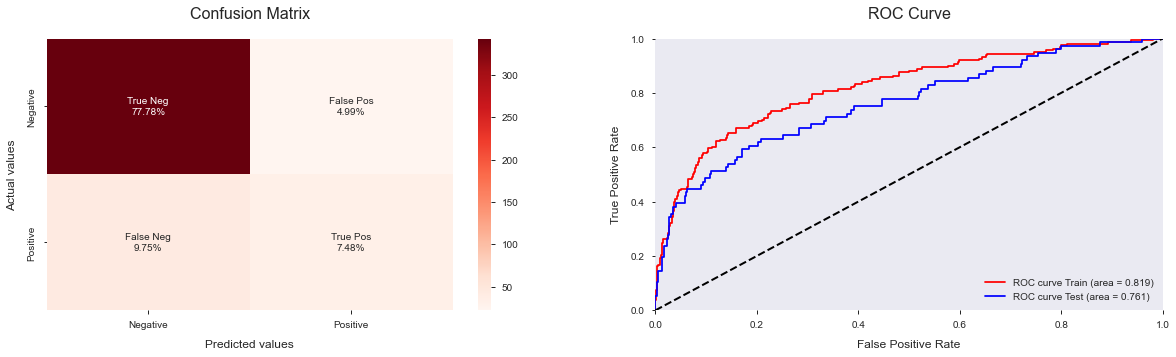

In [88]:
NB = MultinomialNB()
NB.fit(train_x,train_y)
matrixNB= evaluate_model(NB, train_x, train_y, test_x, test_y)

#### Redes Neuronales

,Precision,Recall,F1,Accuracy,MCC,Roc-Auc
Train set,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Test set,0.407407,0.289474,0.338462,0.804989,0.232502,0.704903


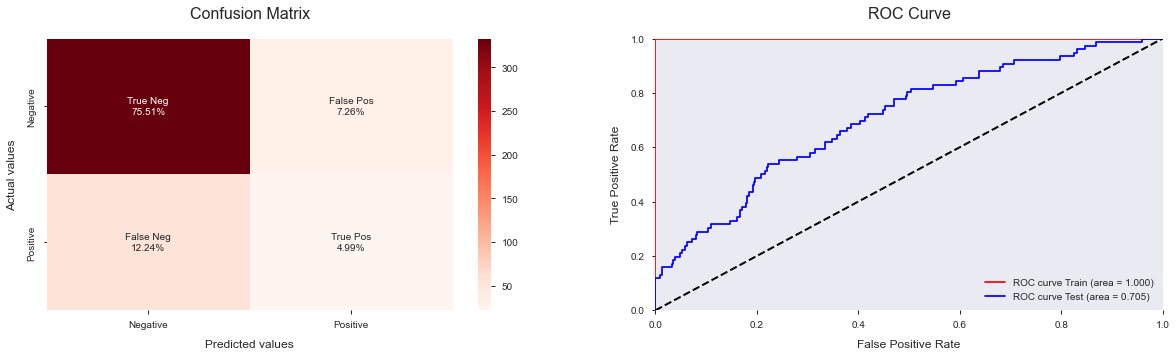

In [89]:
RN = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1)
RN.fit(train_x,train_y)
matrixRN = evaluate_model(RN, train_x, train_y, test_x, test_y)

#### comparando estos modelos elegimos la regrecion logistica que es la que mejores metricas me ha dado

### Podemos analizar la importania que le da cada modelo a los predictores

#### Random Forest

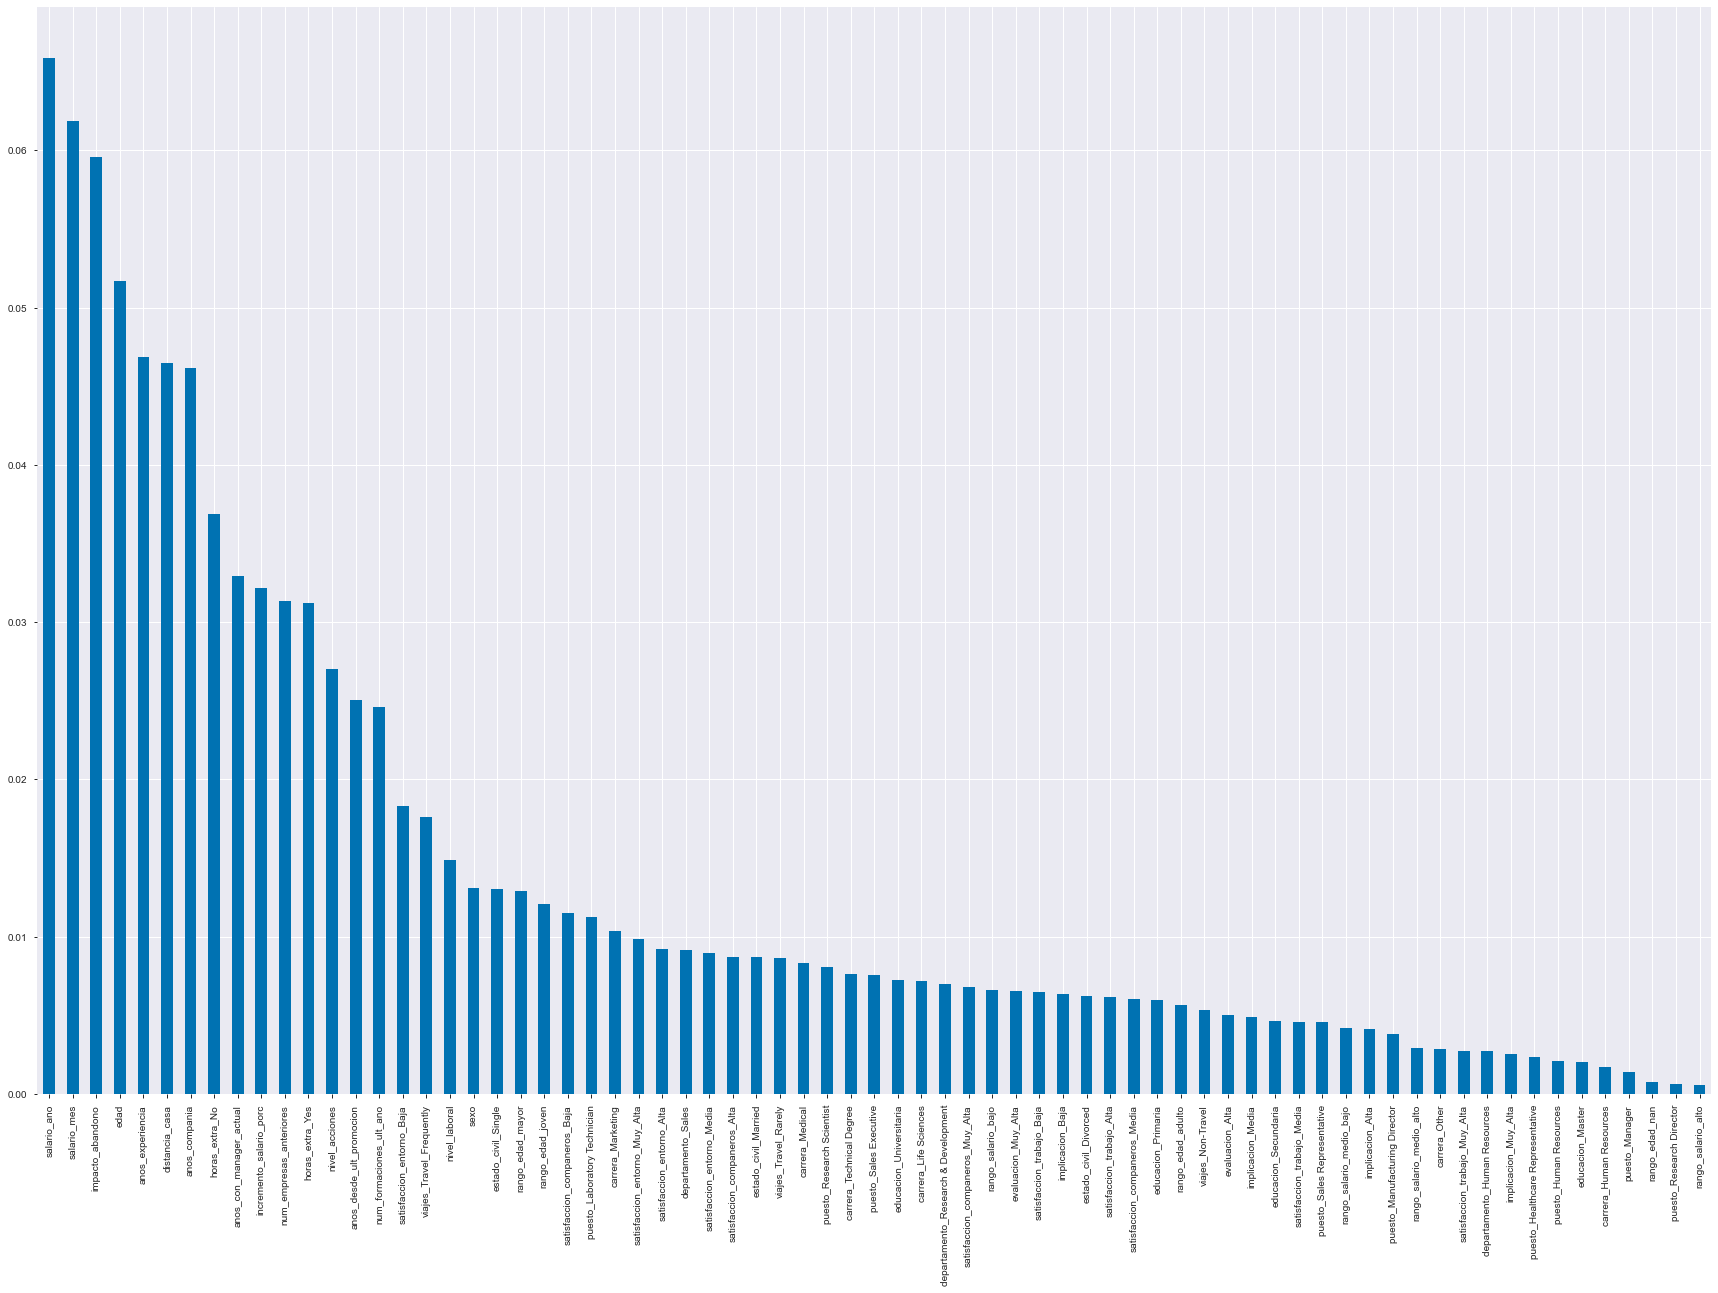

In [93]:
pd.Series(RFC.feature_importances_,index = test_x.columns).sort_values(ascending = False).plot(kind = 'bar', figsize = (30,20));

#### Regresion Logistica

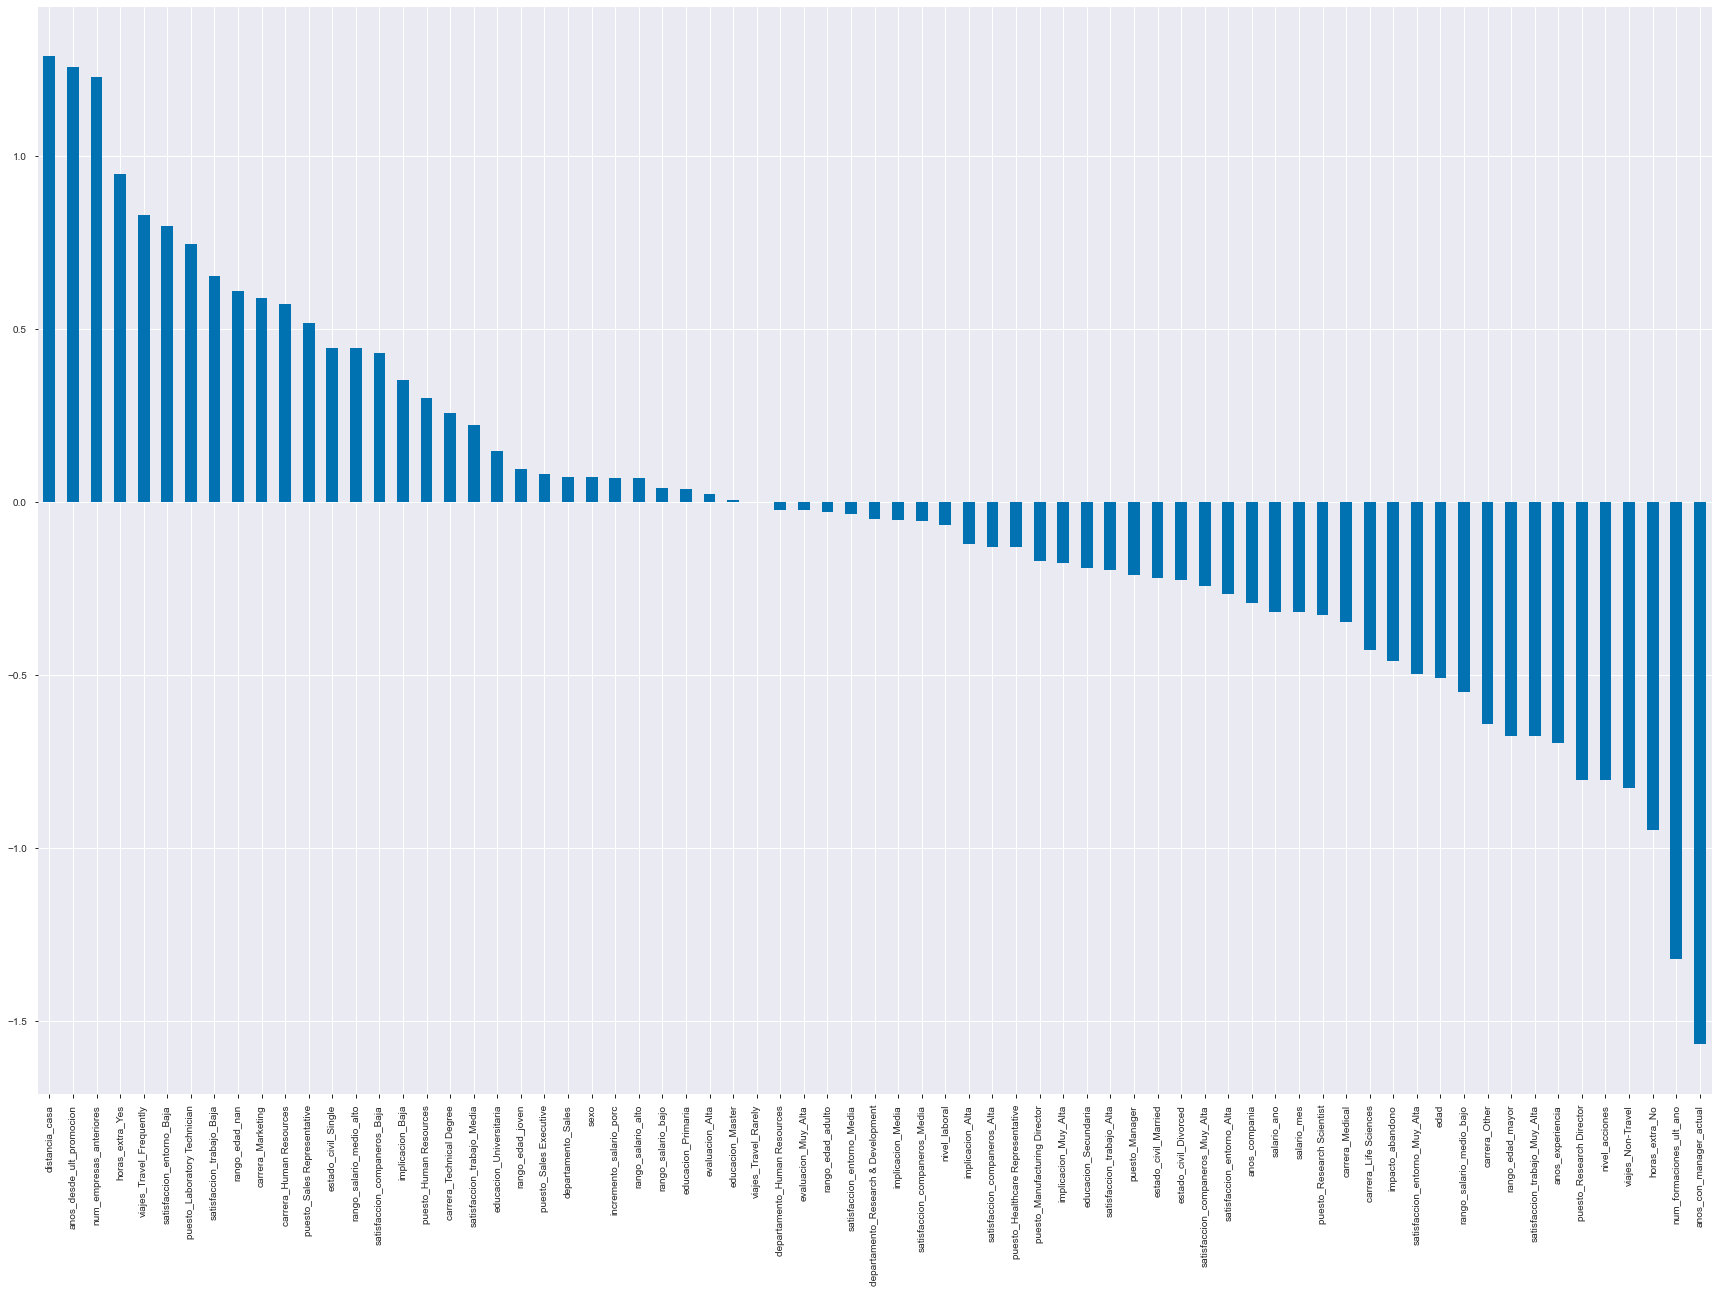

In [101]:
pd.Series(LR.coef_[0],index = test_x.columns).sort_values(ascending = False).plot(kind = 'bar', figsize = (30,20));

### Habiendo elegido el modelo de Regresion Logistica, sacaremos las probabilidades de cada unos de los empleados de renunciar y se lo agregaremos al dataset original

In [116]:
df['scoring_abandono'] = LR.predict_proba(df_ml.drop(columns = 'abandono'))[:, 1]
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,sexo,implicacion,...,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,rango_edad,rango_salario,salario_ano,impacto_abandono,scoring_abandono
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,3,Alta,...,8,0,6,0,5,mayor,medio_bajo,71916,14670.864,0.450971
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,2,Media,...,10,3,10,1,7,mayor,medio_bajo,61560,12558.240,0.006712
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,2,Media,...,7,3,0,0,0,mayor,bajo,25080,4037.880,0.462900
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,3,Alta,...,8,3,8,3,0,adulto,bajo,34908,6876.876,0.293680
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,3,Alta,...,6,3,2,2,2,joven,bajo,41616,8198.352,0.375088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,Travel_Frequently,Research & Development,23,Master,Medical,Alta,4,Muy_Alta,...,17,3,5,0,3,mayor,bajo,30852,6077.844,0.091412
2062,39,0,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,2,Media,...,9,5,7,1,7,mayor,medio_alto,119892,25177.320,0.012521
2064,27,0,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,4,Muy_Alta,...,6,0,6,0,3,joven,medio_bajo,73704,15035.616,0.090355


#### Ahora podemos identificar segun nuestro modelo cuales son los 10 empleados que son mas probable que renuncien

In [117]:
df.sort_values(by = 'scoring_abandono', ascending = False)[0:10]

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,sexo,implicacion,...,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,rango_edad,rango_salario,salario_ano,impacto_abandono,scoring_abandono
id,,,,,,,,,,,,,,,,,,,,,
622,26,1,Travel_Rarely,Research & Development,24,Primaria,Technical Degree,Alta,1,Baja,...,1,3,1,0,0,joven,bajo,28080,4520.880,0.966355
1273,25,1,Travel_Frequently,Sales,24,Primaria,Life Sciences,Alta,1,Baja,...,1,4,1,1,0,joven,bajo,13416,2159.976,0.958002
614,18,1,Travel_Frequently,Sales,5,Universitaria,Marketing,Media,3,Alta,...,0,3,0,0,0,nan,bajo,22536,3628.296,0.955162
478,21,1,Travel_Frequently,Sales,1,Secundaria,Technical Degree,Baja,2,Media,...,3,3,3,1,2,joven,bajo,26088,4200.168,0.945442
911,32,1,Travel_Rarely,Research & Development,25,Universitaria,Life Sciences,Baja,3,Alta,...,1,2,1,0,1,joven,bajo,33540,6607.380,0.927152
1108,33,1,Travel_Rarely,Research & Development,25,Secundaria,Medical,Baja,2,Media,...,5,0,2,2,2,adulto,bajo,27756,4468.716,0.922756
1624,18,1,Travel_Frequently,Sales,3,Universitaria,Medical,Media,3,Alta,...,0,2,0,0,0,nan,bajo,18828,3031.308,0.914480
167,19,1,Travel_Rarely,Sales,22,Universitaria,Marketing,Muy_Alta,3,Alta,...,0,2,0,0,0,joven,bajo,20100,3236.100,0.907031
1077,20,1,Travel_Frequently,Sales,9,Universitaria,Marketing,Muy_Alta,3,Alta,...,2,3,2,0,2,joven,bajo,27876,4488.036,0.897679


### Este dataset se puede usar ahora para hacer nuevos analisis por ejemplo el porcentaje de abandono segun el puesto de trabajo

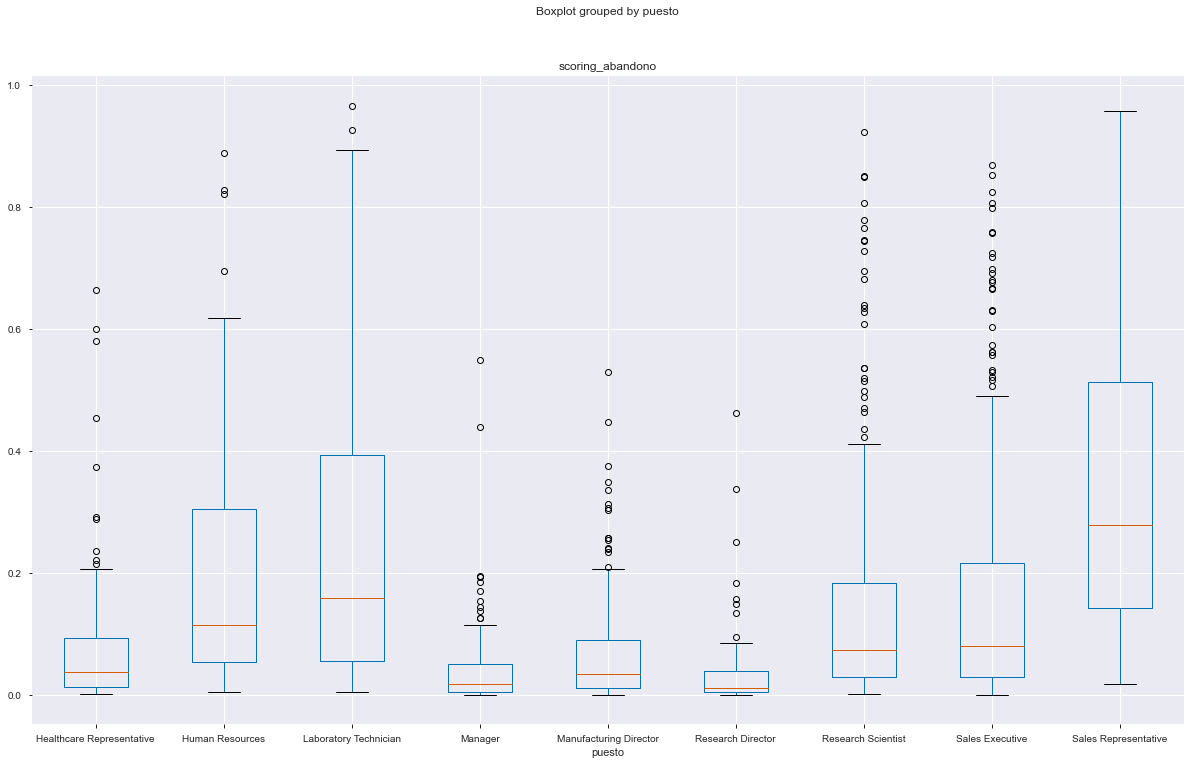

In [118]:
df.boxplot(column='scoring_abandono', by='puesto', figsize = (20,12));

### Por ultimo exportamos el dataframe para poder realizar mas analisis en herramientas como Tableau o Power BI

In [119]:
df.to_excel('abandono_con_scoring.xlsx') 